# Simulation Analysis

This jupyter notebook relies on the *scripts/measurements_dico.py* and allows one to retrieve easily and rapidly the simulations results and display graphs. We describe how it works here.

The first thing you should do is call the program on the data you want to analyze. In order to do so, use md.get_measurements_along(measurements,folder,convergenceFor,errors=True)


* *measurements* is a dict() of the measurements you want to be able to graph (they are loaded in memory at this point). 
  * measurements["Matsubara"] contains the observables with Matsubara frequency dependance. The actual requirement for an element **name** in measurements["Matsubara"] to be correct is there should be files names **name**i.dat where i is an integer in all DATA folder. (for example **green**, **ChiFull** or **dgreen**)
  
  * measurements["Normal"] contains the observables with no Matsubara frequency dependance. These observables can be any name for which there exists a name.dat file in the DATA directory. But other names can be accepted (for example order or occupation, see scripts/measurements_dico.py). Those special observables computed from other observables and parameters by this program are only computed once and saved in an "*observable_name*.dat" file in the DATA directory of the simulation.
  
* *folder* is the folder in which the simulations are. I usually use folder="AllData"
  
  
* *convergenceFor* is the number of iterations you want to mean on in order to get the result (due to error in Monte Carlo simulations). The value of the observable will be the mean on the *convergenceFor* last iterations of the simulation. This value should be chosen and then never changed. I usually use convergenceFor=15
  
  
* *errors* allows one to compute approximate errors on the graph points (the error is just $\sqrt{\frac{Var(X)}{len(convergedFor)}}$, where X is the last convergedFor iterations of the observable).
  
  

In [1]:
import json
import sys
import numpy as np
from scripts import utils
from scripts import measurements_dico as md
import matplotlib.pyplot as plt
from importlib import reload  
reload(md)
%matplotlib notebook

#plt.style.use('seaborn-dark')
measurements = {"Normal" : ["N","pn","occupation","sign","stiffness","D","SzSites","k","ekin","Chi0","order"],
                   "Matsubara": {}
               }

eps = [7,8,8.5,8.75,9,9.1,9.2,9.25,9.3,9.35,9.5]
Us = [11.75,12,12.25,12.5,12.75,13]
tpds = [1.3,1.4,1.5,1.6,1.7]
tppps = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.6,1.8]

print("Loading Only-Supra")
dico = md.get_measurements_along(measurements,"AllData/Only_Supra/Sens-normal/",15,errors=True)
dico_supra = dico
print("Loading Only-Supra Hysteresis")
dico_hyst =  md.get_measurements_along(measurements,"AllData/Only_Supra/Hysteresis/",15,errors=True)
print("Loading AntiFerro")
dico_antiferro = md.get_measurements_along(measurements,"AllData/Anti_ferro/Sens-normal/",15,errors=True)
print("Loading AntiFerro Hysteresis")
dico_hyst_antiferro = md.get_measurements_along(measurements,"AllData/Anti_ferro/Hysteresis/",15,errors=True)

print("Loading Ferro")
dico_ferro = md.get_measurements_along(measurements,"AllData/Ferro/",15,errors=True)



Loading Only-Supra
Total number of measurement folders : 933
Loading Only-Supra Hysteresis
Total number of measurement folders : 85
Loading AntiFerro
Total number of measurement folders : 66
Loading AntiFerro Hysteresis
Total number of measurement folders : 26
Loading Ferro
Total number of measurement folders : 2


<IPython.core.display.Javascript object>


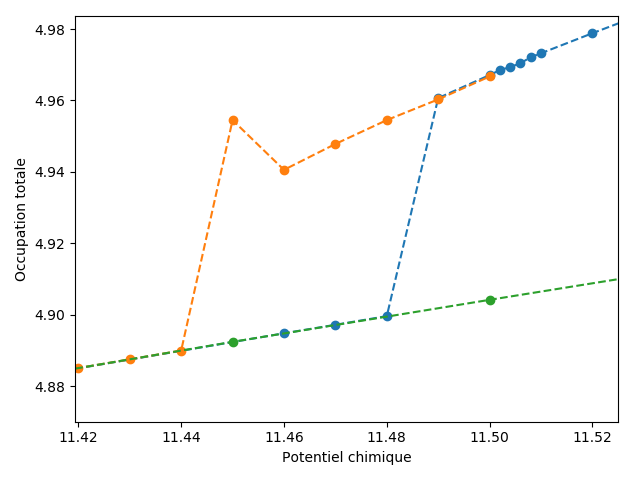

<IPython.core.display.Javascript object>


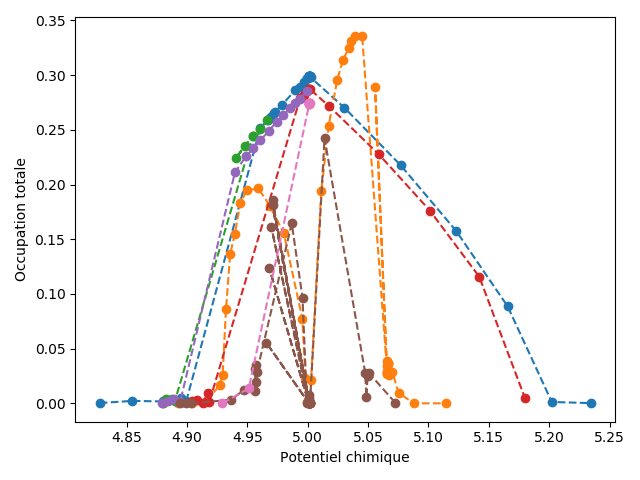

<IPython.core.display.Javascript object>


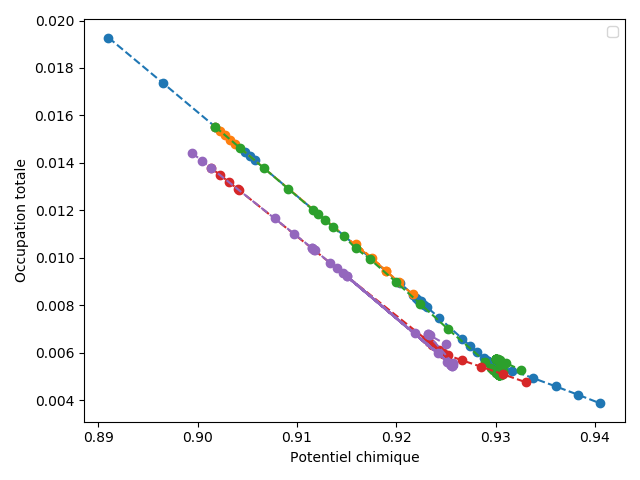

No handles with labels found to put in legend.


In [68]:
%matplotlib notebook


def aff_one(X,f,ax,label="",color=None):
    ax.set_ylabel("Occupation totale")
    ax.set_xlabel("Potentiel chimique")
    f = f[:,0]#[X[:,0]<5.001]
    X = X[:,0]#[X[:,0]<5.001]
    
    func = lambda x,f : (2 - 2*x,2-2*f)
    
    #f = np.gradient(f,X)
    #X,f = func(X,f)
    
    color = ax.errorbar(X,f,fmt='--o',label=label,color=color)[0].get_color() 
    plt.tight_layout()
    return color
    
def aff(X,f,ax,label="",color=None):
    #aff_one(X,(f[:,0] - f[:,1])/2,ax,label)
    return aff_one(X,f,ax,label,color=color)
    
def aff_spin(X,f,ax,label=""):
    aff_one(X,np.abs(f[:,0] - f[:,1] + f[:,2] - f[:,3])/4,ax,label)
    
fig,ax = plt.subplots()
to_plot = ["mu","occupation"]
orderBy = "mu"

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico_antiferro.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff(g,f,ax)

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico_hyst_antiferro.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff(g,f,ax)

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff(g,f,ax)

params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico_antiferro.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff(g,f,ax)

#delta=0.22
delta=0
params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico_hyst_antiferro.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff(g-delta,f,ax)

params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff(g,f,ax)

params = {"beta":60,"ep":9.5,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff(g,f,ax)


params = {"beta":60,"ep":9.5,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico_antiferro.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff(g,f,ax)

fig,ax = plt.subplots()
to_plot = ["occupation","SzSites"]
orderBy = "mu"

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico_antiferro.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff_spin(g,f,ax)


params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico.plot_dico([to_plot[0],"order"],orderBy = orderBy,conds = params)
aff(g,f*20,ax)

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico_hyst_antiferro.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff_spin(g,f,ax)


params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico_antiferro.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff_spin(g,f,ax)

params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico_hyst_antiferro.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff_spin(g,f,ax)

params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico.plot_dico([to_plot[0],"order"],orderBy = orderBy,conds = params)
aff(g,f*20,ax)

params = {"beta":60,"ep":9.5,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
g,f = dico_antiferro.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff_spin(g,f,ax)



fig,ax = plt.subplots()
kin = ["pn","D","N"]
func = lambda pn,D,N:(pn,D - (2*N-1))
orderBy = "mu"

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
pn,D,N = dico_antiferro.plot_dico(kin,orderBy = orderBy,conds = params)
pn,D = func(pn,D,N)
aff(pn,D,ax)

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
pn,D,N = dico_hyst_antiferro.plot_dico(kin,orderBy = orderBy,conds = params)
pn,D = func(pn,D,N)
aff(pn,D,ax)


params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
pn,D,N = dico.plot_dico(kin,orderBy = orderBy,conds = params)
pn,D = func(pn,D,N)
aff(pn,D,ax)

params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
pn,D,N = dico_antiferro.plot_dico(kin,orderBy = orderBy,conds = params)
pn,D = func(pn,D,N)
aff(pn,D,ax)

params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
pn,D,N = dico.plot_dico(kin,orderBy = orderBy,conds = params)
pn,D = func(pn,D,N)
aff(pn,D,ax)



#Ns = np.array([0.64,0.7])
#plt.plot(Ns,2*Ns-1)
    

plt.legend()
#plot_half(ax)
#ax.set_aspect('equal')
#ax.set_ylim(top=0.012)
#ax.set_xlim(4.895,5.005)
#plt.tight_layout()

#fig.savefig('Graphs/results/mu-occ-ep',dpi=300)
plt.show()

<IPython.core.display.Javascript object>


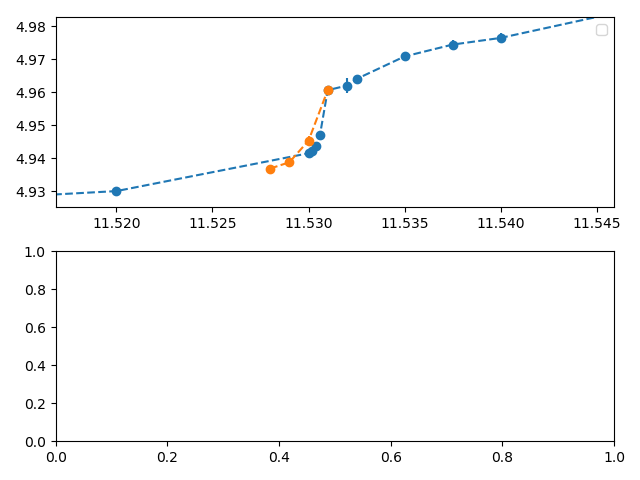

No handles with labels found to put in legend.


In [39]:
%matplotlib notebook
fig,ax = plt.subplots(2)


def aff(data,ax,label=None,color = None):
    #f = f[X[:,0]<5.001]
    #X = X[X[:,0]<5.001]
    #ax.set_xlabel("Occupation totale")
    #ax.set_ylabel("Paramètre d'ordre")
    X = data[0]
    f = data[1]
    
    color = ax[0].errorbar(X[:,0],f[:,0],xerr=8*X[:,1],yerr=8*f[:,1], fmt='--o',label=label,color=color)[0].get_color()
    plt.tight_layout()
    return color


to_plot = ["mu","occupation"]
params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.3,"zero_order":0}
plot_data = dico_supra.plot_dico(to_plot,orderBy = "mu",conds = params)
aff(plot_data,ax)
params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.3,"zero_order":0}
plot_data = dico_hyst.plot_dico(to_plot,orderBy = "mu",conds = params)
aff(plot_data,ax)
    
    
    
"""
for beta in betas:
    params = {"beta":beta,"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
    plot_data = dico.plot_dico(to_plot,conds = params)
    mu,occupation = plot_data
    aff(mu,occupation,ax)
"""

ax[0].legend()
#ax.set_aspect('equal')
plt.tight_layout()
plt.show()

Once you executed the first cell (it takes some time on new data), you can get the plottable data using just one function : 

dico.plot_dico(to_plot,orderBy = None, conds = {}).
* to_plot is an array of strings that are the different observables or parameters names you want to get. This array should not be empty.
* orderBy is used in order to order the returned arrays in function of another measurement or a parameter. It is optional and when not given, the data is orderd as a function of the first string on to_plot
* conds is a dict() of the conditions you want to impose on the returned arrays. It contains only parameter conditiions. It is optional but used almost every time.

Internally the function selects all the simulations that meet the conditions imposed by the *conds* variable. It then returns a an array of the same length as to_plot. Each element of this array is itself an array that contains the observables or parameters corresponding to all the selected simulations. If errors was set to True when defining the Measurements_dico, the last dimension of the array is of size 2, the first value being the value and the second being the error on this value (0 when you need a parameter).

We provide an example of a cell but not the data as it is relatively large (30 Mo per simulation). 
This example allows one to plot the superfluid stiffness as a function of total occupation for a certain set of parameters.

<IPython.core.display.Javascript object>


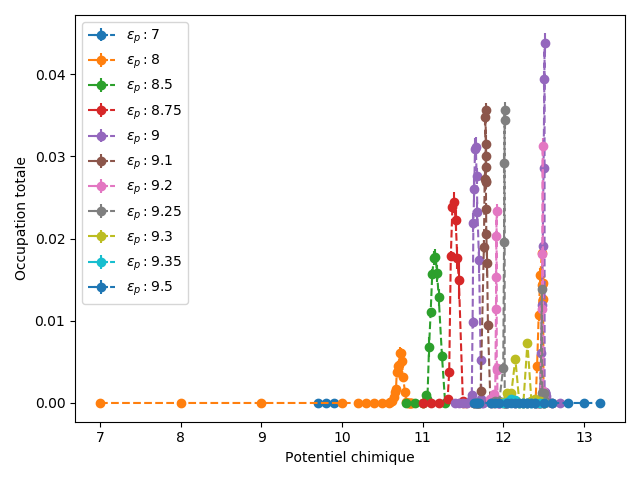

In [2]:
%matplotlib notebook



def aff(data,ax,label=""):
    ax.set_ylabel("Occupation totale")
    ax.set_xlabel("Potentiel chimique")
    occupation = data[-1]
    for i in range(len(data)):
        #data[i] = data[i][occupation[:,0]<5.001]
        pass
    X = data[0]
    f = data[1]
    f_err = f[:,1]*4
    x_err = X[:,1]*4
    f = f[:,0]#[X[:,0]<5.001]
    X = X[:,0]#[X[:,0]<5.001]
    occupation = occupation[:,0]
    
    #f = np.gradient(f,X)
    ax.errorbar(X,f,xerr=x_err,yerr=f_err,fmt='--o',label=label)  
    plt.tight_layout()
    
fig,ax = plt.subplots()

to_plot = ["mu","stiffness","order","occupation"]
orderBy = "mu"


for ep in eps:
    params = {"beta":60,"ep":ep,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
    data = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
    aff(data,ax,label="$\epsilon_p : " + str(ep) + "$")
    
for U in Us:
    params = {"beta":60,"ep":9.0,"U":U,"tpd":1.5,"tppp":1.,"zero_order":0}
    data = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
    #aff(data,ax,label="U : " +str(U))
    
for tpd in tpds:
    params = {"beta":60,"ep":9,"U":12,"tpd":tpd,"tppp":1.,"zero_order":0}
    data = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
    #aff(data,ax,label="$t_{pd} : " + str(tpd) + "$")
    
for tppp in tppps:
    params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":tppp,"zero_order":0}
    data = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
    #aff(data,ax,label="$t_{pp}' : " + str(tppp) + "$")
    
        
#Ns = np.array([0.5,0.74])
#plt.plot(Ns,2*Ns-1,"-")
    
plt.legend()
#plot_half(ax)
#ax.set_aspect('equal')
#ax.set_ylim(top=0.012)
#ax.set_xlim(4.895,5.005)
#plt.tight_layout()

#fig.savefig('Graphs/results/mu-occ-ep',dpi=300)
plt.show()

<IPython.core.display.Javascript object>


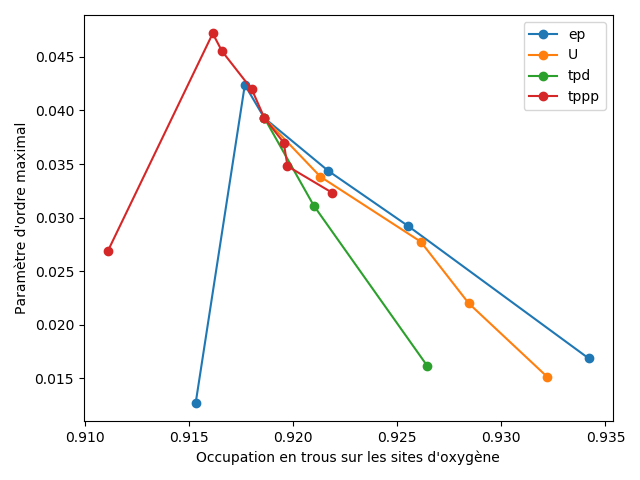

ep : 8
ep : 8.5
ep : 8.75
ep : 9
ep : 9.1
ep : 9.3
U : 12
U : 12.25
U : 12.5
U : 12.75
U : 13
tpd : 1.3
tpd : 1.4
tpd : 1.5
tppp : 0.4
tppp : 0.7
tppp : 0.8
tppp : 0.9
tppp : 1
tppp : 1.1
tppp : 1.2
tppp : 1.3
SpearmanrResult(correlation=-0.5752413401476434, pvalue=0.005096498337764992)
(-0.5889032061855035, 0.003931976567539896)


In [11]:
from scipy import stats
%matplotlib notebook
plot_dico = {}
def add_aff_max(data,ax,label="",factor=0):
    X = data[0]
    Y = data[1]
    mu = data[2]
    occ = data[3]
    f = data[4]
    f[:,0][occ[:,0]>5.001] = 0 #Make sure we plot only hole doped states
    
    
    ax.set_ylabel("Paramètre d'ordre maximal")
    ax.set_xlabel("Occupation en trous sur les sites d'oxygène")
    if label not in plot_dico:
        plot_dico[label] = {}
        plot_dico[label]["X"] = []
        plot_dico[label]["f"] = []
    factor = factors[label][factor]
    plot_dico[label]["X"].append(get_max_X(X,f,factor))
    plot_dico[label]["f"].append(4*get_max_f(X,f,factor))
    plt.tight_layout()

def get_max_X(X,f,factor):
    y,x = utils.sort_points(f[:,0],X[:,0])
    if factor == 1:
        return x[-1]
    elif factor == 2:
        return (x[-1] + x[-2])/2
   
    
def get_max_f(X,f,factor):
    return np.max(f[:,0])
fig,ax = plt.subplots()
params_start = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1}
to_plot = ["pn","N","mu","occupation","order"]
betas = [64,60,55,50,47,45]
eps = [8,8.5,8.75,9,9.1,9.3]
Us = [12,12.25,12.5,12.75,13]
tpds = [1.3,1.4,1.5]
tppps = [0.4,0.7,0.8,0.9,1,1.1,1.2,1.3]
factors = {"ep" : [1,1,2,2,2,1],
            "U" : [2,1,1,1,1] ,
          "tpd" : [1,2,2,1],
          "tppp" : [1,2,1,1,2,2,1,2]}
    
beta = 60
for i,ep in enumerate(eps):
    params = params_start.copy()
    params["ep"] = ep
    to_plot_data = dico.plot_dico(to_plot,conds = params)
    print("ep : " + str(ep))
    color = add_aff_max(to_plot_data ,ax,label="ep",factor=i) 
    
    
beta = 60
for i,U in enumerate(Us):
    params = params_start.copy()
    params["U"] = U
    to_plot_data = dico.plot_dico(to_plot,conds = params)
    print("U : " + str(U))
    color = add_aff_max(to_plot_data,ax,label="U",factor=i) 
     
beta = 60
for i,tpd in enumerate(tpds):
    params = params_start.copy()
    params["tpd"] = tpd
    to_plot_data = dico.plot_dico(to_plot,conds = params)
    print("tpd : " + str(tpd))
    color = add_aff_max(to_plot_data,ax,label="tpd",factor=i) 
       
beta = 60
for i,tppp in enumerate(tppps):
    params = params_start.copy()
    params["tppp"] = tppp
    to_plot_data = dico.plot_dico(to_plot,conds = params)
    print("tppp : " + str(tppp))
    color = add_aff_max(to_plot_data,ax,label="tppp",factor=i) 
 
all_X = []
all_F = []
for key, value in plot_dico.items():
    all_X.extend(value["X"])
    all_F.extend(value["f"])
    ax.plot(value["X"],value["f"],"-o",label=key)
    
print(stats.spearmanr(all_X,all_F))
print(stats.pearsonr(all_X,all_F))

plt.legend()
plt.tight_layout()
plt.savefig("Comparaison-best",bbox_inches="tight",pad_inches=0.5, dpi=150)
#plt.show()

<IPython.core.display.Javascript object>


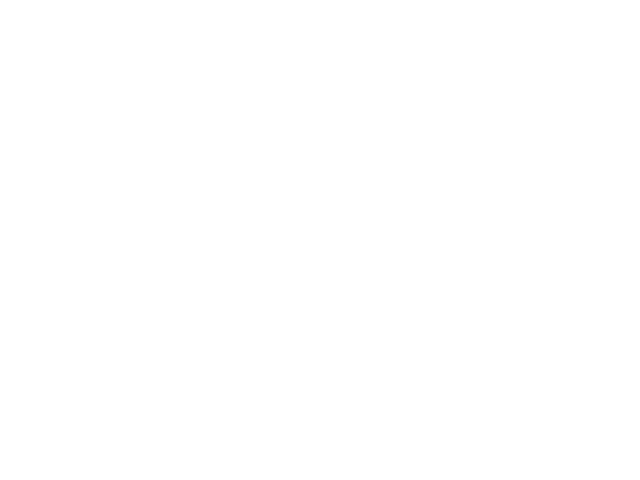

KeyError: 'derivative'

In [41]:
%matplotlib notebook

def aff(X,f,ax,label="",color=None):
    ax.set_ylabel("Order Parameter")
    ax.set_xlabel("Total Occupation")
    f[X[:,0]>5] = 0
    X[:,0][X[:,0]>5] = 5
    color = ax.errorbar(X[:,0],f[:,0],xerr=8*X[:,1],yerr=8*f[:,1],fmt='--o',label=label,color = color)[0].get_color()  
    plt.tight_layout()
    return color
fig,ax = plt.subplots()

to_plot = ["occupation","order"]
orderBy = "mu"
start_max_order = 0.0168/4
path_params  = [ [{"beta":60,"ep":8,"U":12,"tpd":1.5,"tppp":1},"ep"],
                [{"beta":60,"ep":8,"U":12,"tpd":1.5,"tppp":0.8},"tppp"],
                [{"beta":60,"ep":8,"U":12,"tpd":1.5,"tppp":0.6},"tppp"],
                [{"beta":60,"ep":7,"U":12,"tpd":1.5,"tppp":0.6},"ep"],
                [{"beta":60,"ep":7.5,"U":12,"tpd":1.5,"tppp":0.6},"ep"],
                [{"beta":60,"ep":7.5,"U":12,"tpd":1.7,"tppp":0.6},"tpd"],
               ]
current_max_order = start_max_order
actual_current_max_order = start_max_order
color = ax.plot([4.9,5],2*[start_max_order])[0].get_color()
for i,params in enumerate(path_params) :
    g,f = dico.plot_dico(to_plot,orderBy = orderBy,conds = params[0])
    color = aff(g,f,ax,label="path : " + str(i),color = color)
    if(i != 0):
        param = params[1]
        value = current_max_order + plot_dico[param]["derivative"]*(params[0][param] - path_params[i-1][0][param])/4
        current_max_order = value
        plt.plot([4.9,5],2*[value],color = color)
        value = actual_current_max_order + plot_dico[param]["derivative"]*(params[0][param] - path_params[i-1][0][param])/4
        actual_current_max_order = np.max(f[:,0])
        #plt.plot([4.9,5],2*[value],"--",color = color)
    color = None
plt.legend(loc="upper left")
#plot_half(ax)
#ax.set_aspect('equal')
#ax.set_ylim(top=0.012)
#ax.set_xlim(4.895,5.005)
plt.tight_layout()
plt.gcf().savefig("Gradient.png", bbox_inches='tight',dpi=400)
plt.show()

<IPython.core.display.Javascript object>


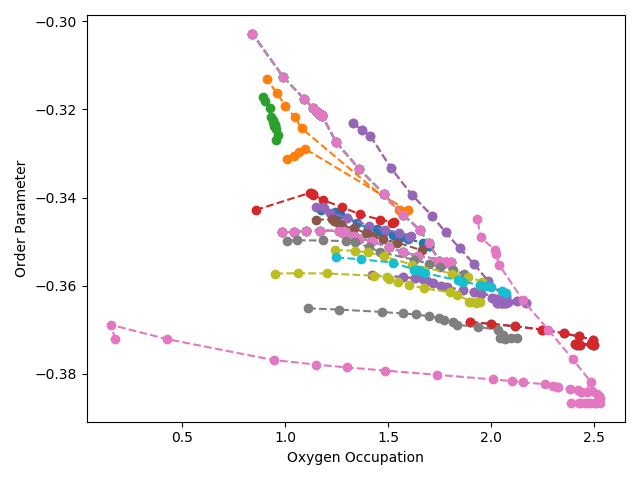

In [44]:
#tpd change
%matplotlib notebook
def aff(X,f,ax,label="Rien"):
    ax.set_ylabel("Order Parameter")
    ax.set_xlabel("Oxygen Occupation")
    ax.errorbar(X[:,0],f[:,0],xerr=X[:,1]/60*8,yerr=f[:,1]*8/8, fmt='--o',label=label) 
    plt.tight_layout()
fig,ax = plt.subplots(1)

function = lambda x : [x[0],x[2] - x[1]]

to_plot = ["Chi0","N","D"]
orderBy = "mu"
for tpd in tpds:
    params = {"beta":60,"ep":9,"U":12,"tpd":tpd,"tppp":1,"zero_order":0}
    all_plots = dico.plot_dico(to_plot,conds = params,orderBy = orderBy)
    all_plots = function(all_plots)
    aff(all_plots[0],all_plots[1],ax)
    
for tpd in tpds:
    params = {"beta":60,"ep":9,"U":12,"tpd":tpd,"tppp":1,"zero_order":0}
    all_plots = dico.plot_dico(to_plot,conds = params,orderBy = orderBy)
    all_plots = function(all_plots)
    aff(all_plots[0],all_plots[1],ax)
    
for ep in eps:
    params = {"beta":60,"ep":ep,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
    all_plots = dico.plot_dico(to_plot,conds = params,orderBy = orderBy)
    all_plots = function(all_plots)
    aff(all_plots[0],all_plots[1],ax)
    
for tppp in tppps:
    params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":tppp,"zero_order":0}
    all_plots = dico.plot_dico(to_plot,conds = params,orderBy = orderBy)
    all_plots = function(all_plots)
    aff(all_plots[0],all_plots[1],ax)
    

#plt.savefig("Comparaison-best",bbox_inches="tight",pad_inches=0.5, dpi=150)
plt.show()

<IPython.core.display.Javascript object>


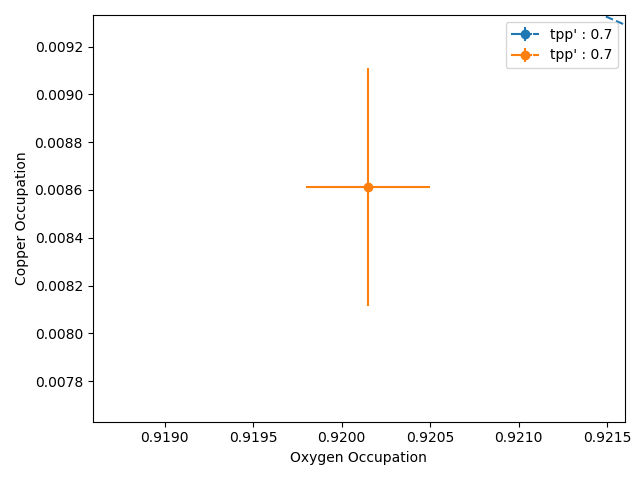

In [9]:
%matplotlib notebook
def aff(X,f,ax,label=""):
    ax.set_ylabel("Copper Occupation")
    ax.set_xlabel("Oxygen Occupation")
    ax.errorbar(X[:,0],f[:,0],xerr=8*X[:,1],yerr=8*f[:,1], fmt='--o',label=label)  
    plt.tight_layout()
fig,ax = plt.subplots()

to_plot = ["pn","order"]
orderBy = "mu"
betas = [60,53]
for beta in betas:
    params = {"beta":beta,"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
    g,f = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
    aff(g,f,ax,label="tpp' : " + str(0.7))
    
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


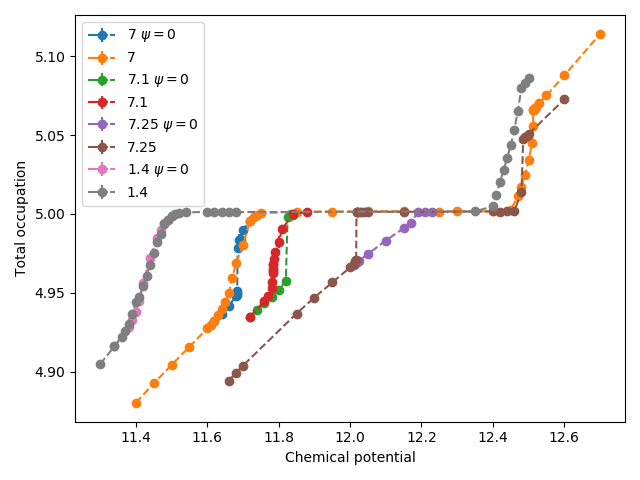

In [58]:
import numpy as np
#tppp change
%matplotlib notebook
def aff(X,f,ax,label="Rien"):
    ax.set_ylabel("Total occupation")
    ax.set_xlabel("Chemical potential")
    ax.errorbar(X[:,0],f[:,0],xerr=X[:,1]*8,yerr=f[:,1]*8, fmt='--o',label=label) 
    plt.tight_layout()
fig,ax = plt.subplots()

betas = [60]
eps = [9,9.1,9.25]
to_plot = ["mu","mu","occupation"]
orderBy = "mu"
for beta in betas:
    for ep in eps:
        try:
            params = {"beta":beta,"ep":ep,"U":12,"tppp":1.0,"tpd":1.5,"zero_order":1}
            X,Y,f = dico.plot_dico(to_plot,orderBy=orderBy,conds = params)
            aff(X,f,ax,label=str(ep-2) + " $\psi = 0$")
            params = {"beta":beta,"ep":ep,"U":12,"tppp":1.0,"tpd":1.5,"zero_order":0}
            X,Y,f = dico.plot_dico(to_plot,orderBy=orderBy,conds = params)
            aff(X,f,ax,label=str(ep-2))
        except Exception as e:
            print(e)
            pass

params = {"beta":beta,"ep":9,"U":12,"tppp":1.0,"tpd":1.4,"zero_order":1}
X,Y,f = dico.plot_dico(to_plot,orderBy=orderBy,conds = params)
aff(X,f,ax,label=str(1.4) + " $\psi = 0$")
params = {"beta":beta,"ep":9,"U":12,"tppp":1.0,"tpd":1.4,"zero_order":0}
X,Y,f = dico.plot_dico(to_plot,orderBy=orderBy,conds = params)
aff(X,f,ax,label=1.4)


plt.legend()
#plt.savefig("Comparaison-best",bbox_inches="tight",pad_inches=0.5, dpi=150)
plt.show()

<IPython.core.display.Javascript object>


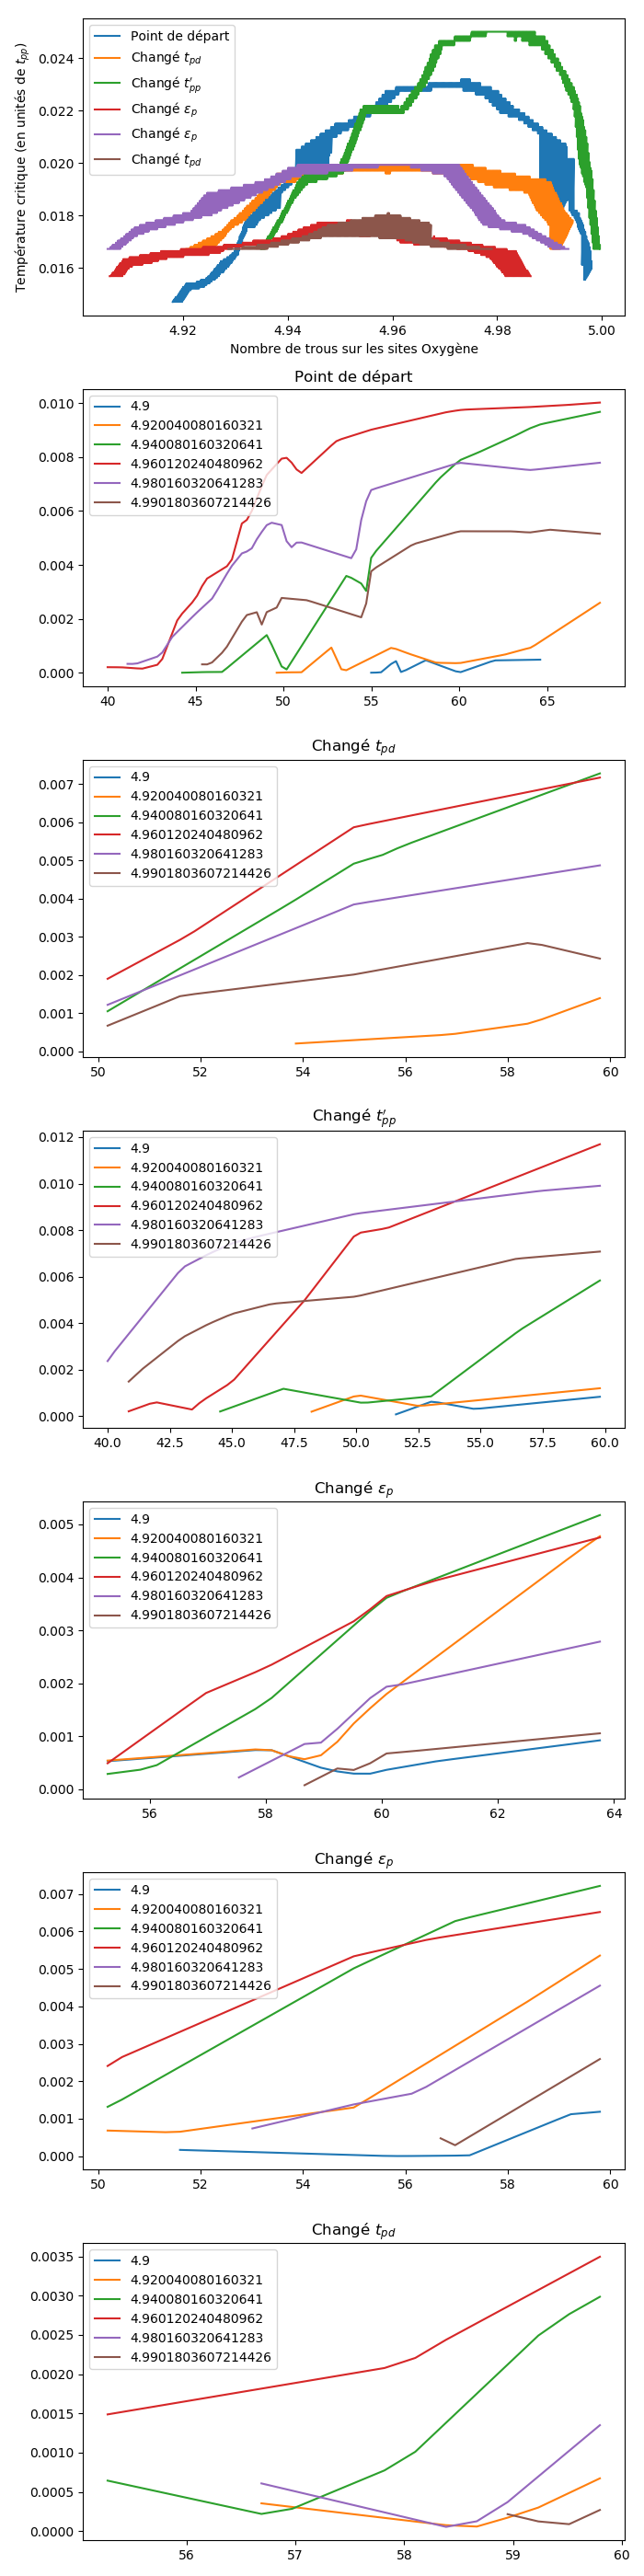

In [17]:
import copy
%matplotlib notebook
from scipy import interpolate
from scripts import utils
n_points = 500
x_axis = "occupation" 
grids = {"occupation":np.linspace(4.90,5,n_points),
         "pn" : np.linspace(0.9,0.95,n_points),
         "N" : np.linspace(0.62,0.68,n_points),
         "mu" : np.linspace(10,12,n_points),
         "Chi0" : np.linspace(1,3,n_points)}

grid = grids[x_axis]
beta_grid = np.linspace(40,68,100)
to_plot = [x_axis,"order"]
seuil_tc = 0.002
var_tc = 0.0005
min_temp = 1/68
lim_occ = 5.001

def plot_Tc(conds_i,ax):
    Y1,X1,order,occ = dico.plot_dico(["beta",x_axis,"order","occupation"],conds = conds[conds_i])
    order = order[:,0][occ[:,0] < lim_occ]
    X1 = X1[:,0][occ[:,0] < lim_occ]
    Y1 = Y1[:,0][occ[:,0] < lim_occ]
    #order[order < 0.002] = 0

    xx, yy = np.meshgrid(grid,beta_grid)
    interpolated = interpolate.griddata((X1,Y1), order, (xx.ravel(), yy.ravel()),method="linear")
    good_shape = interpolated.reshape(len(beta_grid),n_points)
    for occupation_i in [0,100,200,300,400,450]:
        ax[conds_i+1].plot(beta_grid,good_shape[:,occupation_i],label=grid[occupation_i])
        
    ax[conds_i+1].set_title(labels[conds_i])
    ax[conds_i+1].legend()
    
    
    all_tc_points = np.argwhere(np.logical_and(interpolated > seuil_tc-var_tc,interpolated < seuil_tc + var_tc))
    all_tc_points = all_tc_points[:,0]
    x_tc_points = xx.ravel()[all_tc_points]
    y_tc_points = yy.ravel()[all_tc_points]
    x_tc_points,y_tc_points = utils.sort_points(x_tc_points,y_tc_points)
    color = ax[0].plot(np.array(x_tc_points),1/np.array(y_tc_points),label=labels[conds_i])[0].get_color()
    temperatures = np.unique(Y1,return_index=True)[1]
    
    X_plot = np.split(X1,temperatures)[1:]
    Y_plot = np.split(Y1,temperatures)[1:]
    order_plot = np.split(order,temperatures)[1:]
   
    #surf = ax[conds_i+1].plot_surface(xx,yy,interpolated.reshape(xx.shape))

    
def plot_normal(conds,ax):
    X,f = dico.plot_dico(to_plot,conds = conds)
    ax.set_ylabel("Cuivre")
    ax.set_xlabel("Oxygen")
    ploted = ax.errorbar(X[:,0],f[:,0],xerr=8*X[:,1],yerr=8*f[:,1], fmt='--o') 
    plt.tight_layout()
    return ploted[0].get_color()

#plt.savefig("Comparaison-best",bbox_inches="tight",pad_inches=0.5, dpi=150)
conds = [ {"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":0},
         {"ep":9,"U":12,"tpd":1.4,"tppp":1,"zero_order":0},
         {"ep":9,"U":12,"tpd":1.5,"tppp":0.7,"zero_order":0},
         {"ep":8,"U":12,"tpd":1.5,"tppp":1,"zero_order":0},
         {"ep":8.5,"U":12,"tpd":1.5,"tppp":1,"zero_order":0},
         {"ep":9,"U":12,"tpd":1.3,"tppp":1,"zero_order":0}]
labels = ["Point de départ",
         "Changé $t_{pd}$",
         "Changé $t_{pp}'$",
         "Changé $\epsilon_p$",
         "Changé $\epsilon_p$",
         "Changé $t_{pd}$"]
fig,ax = plt.subplots(len(conds)+1,figsize=(7,4.5*len(conds)+1))
#fig,ax = plt.subplots(len(conds)+1,figsize=(7,4))
for i,cond in enumerate(conds):
    plot_Tc(i,ax)

ax[0].set_xlabel("Nombre de trous sur les sites Oxygène")
ax[0].set_ylabel("Température critique (en unités de $t_{pp}$)")
ax[0].legend()
plt.tight_layout()
# Save just the portion _inside_ the second axis's boundaries
extent = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())

# Pad the saved area by 10% in the x-direction and 20% in the y-direction
#fig.savefig('ax2_figure_expanded.png', bbox_inches=extent.expanded(1.5, 1.3),dpi=300)

plt.show()

<IPython.core.display.Javascript object>


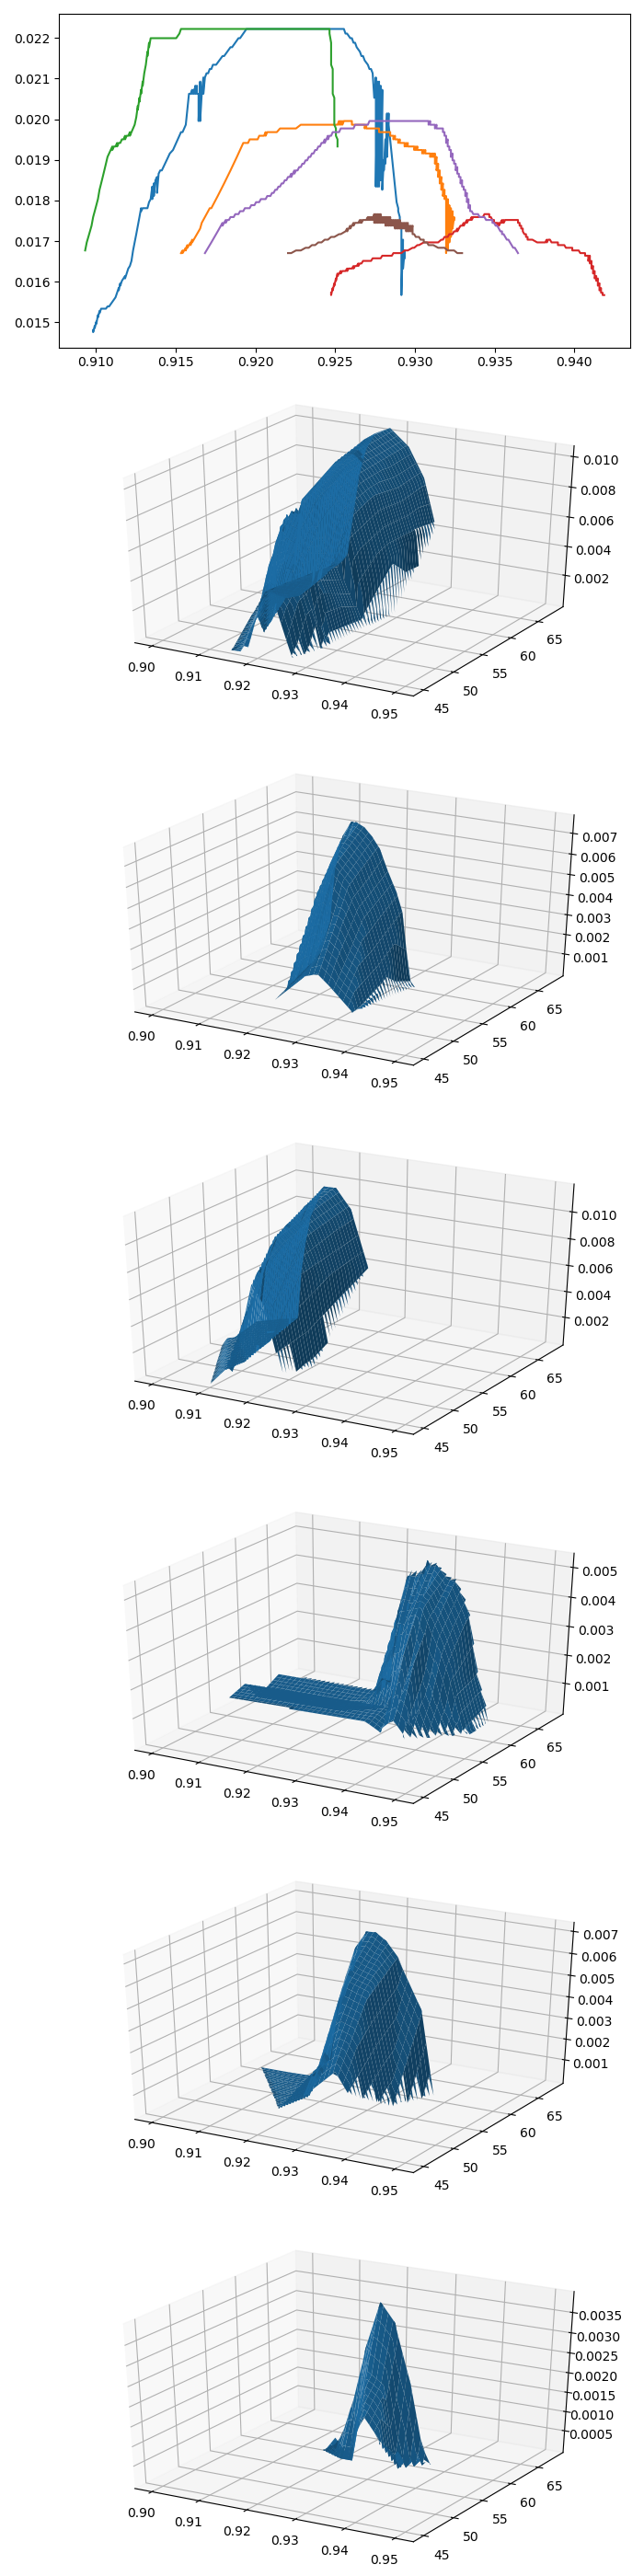

/home/kown2801/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Z contains NaN values. This may result in rendering artifacts.


In [61]:
import copy
%matplotlib notebook
from scipy import interpolate
from scripts import utils
n_points = 500
x_axis = "pn" 
grids = {"occupation":np.linspace(4.90,5,n_points),
         "pn" : np.linspace(0.9,0.95,n_points),
         "N" : np.linspace(0.62,0.68,n_points),
         "mu" : np.linspace(10,12,n_points),
         "Chi0" : np.linspace(1,3,n_points)}

grid = grids[x_axis]
beta_grid = np.linspace(45,68,100)
to_plot = [x_axis,"order"]
seuil_tc = 0.002
var_tc = 0.0001
min_temp = 1/68

def plot_Tc(conds_i,fig,ax_0):
    Y1,X1,order,occ = dico.plot_dico(["beta",x_axis,"order","occupation"],conds = conds[conds_i])
    order = order[:,0][occ[:,0] < 5]
    X1 = X1[:,0][occ[:,0] < 5]
    Y1 = Y1[:,0][occ[:,0] < 5]
    #order[order < 0.002] = 0

    xx, yy = np.meshgrid(grid,beta_grid)
    interpolated = interpolate.griddata((X1,Y1), order, (xx.ravel(), yy.ravel()),method="linear")
    all_tc_points = np.argwhere(np.logical_and(interpolated > seuil_tc - var_tc,interpolated < seuil_tc + var_tc))
    all_tc_points = all_tc_points[:,0]
    x_tc_points = xx.ravel()[all_tc_points]
    y_tc_points = yy.ravel()[all_tc_points]
    x_tc_points,y_tc_points = utils.sort_points(x_tc_points,y_tc_points)
    color = ax_0.plot(np.array(x_tc_points),1/np.array(y_tc_points),label=labels[conds_i])[0].get_color()
    temperatures = np.unique(Y1,return_index=True)[1]
    
    X_plot = np.split(X1,temperatures)[1:]
    Y_plot = np.split(Y1,temperatures)[1:]
    order_plot = np.split(order,temperatures)[1:]
    ax = fig.add_subplot(len(conds)+1,1,conds_i+2,projection="3d")
    surf = ax.plot_surface(xx,yy,interpolated.reshape(xx.shape))

    
def plot_normal(conds,ax):
    X,f = dico.plot_dico(to_plot,conds = conds)
    ax.set_ylabel("Cuivre")
    ax.set_xlabel("Oxygen")
    ploted = ax.errorbar(X[:,0],f[:,0],xerr=8*X[:,1],yerr=8*f[:,1], fmt='--o') 
    plt.tight_layout()
    return ploted[0].get_color()

#plt.savefig("Comparaison-best",bbox_inches="tight",pad_inches=0.5, dpi=150)
conds = [ {"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":0},
         {"ep":9,"U":12,"tpd":1.4,"tppp":1,"zero_order":0},
         {"ep":9,"U":12,"tpd":1.5,"tppp":0.7,"zero_order":0},
         {"ep":8,"U":12,"tpd":1.5,"tppp":1,"zero_order":0},
         {"ep":8.5,"U":12,"tpd":1.5,"tppp":1,"zero_order":0},
         {"ep":9,"U":12,"tpd":1.3,"tppp":1,"zero_order":0}]
labels = ["Point de départ",
         "Changé $t_{pd}$",
         "Changé $t_{pp}'$",
         "Changé $\epsilon_p$",
         "Changé $\epsilon_p$",
         "Changé $t_{pd}$"]

fig = plt.figure(figsize=(7,4.5*len(conds)+1))
ax_0 = fig.add_subplot(len(conds)+1,1,1)

#fig,ax = plt.subplots(len(conds)+1,)
for i,cond in enumerate(conds):
    plot_Tc(i,fig,ax_0)

ax[0].set_xlabel("Nombre de trous sur les sites Oxygène")
ax[0].set_ylabel("Température critique (en unités de $t_{pp}$)")
ax[0].legend()
plt.tight_layout()
# Save just the portion _inside_ the second axis's boundaries
extent = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())

# Pad the saved area by 10% in the x-direction and 20% in the y-direction
#fig.savefig('ax2_figure_expanded.png', bbox_inches=extent.expanded(1.5, 1.3),dpi=300)
plt.show()

<IPython.core.display.Javascript object>


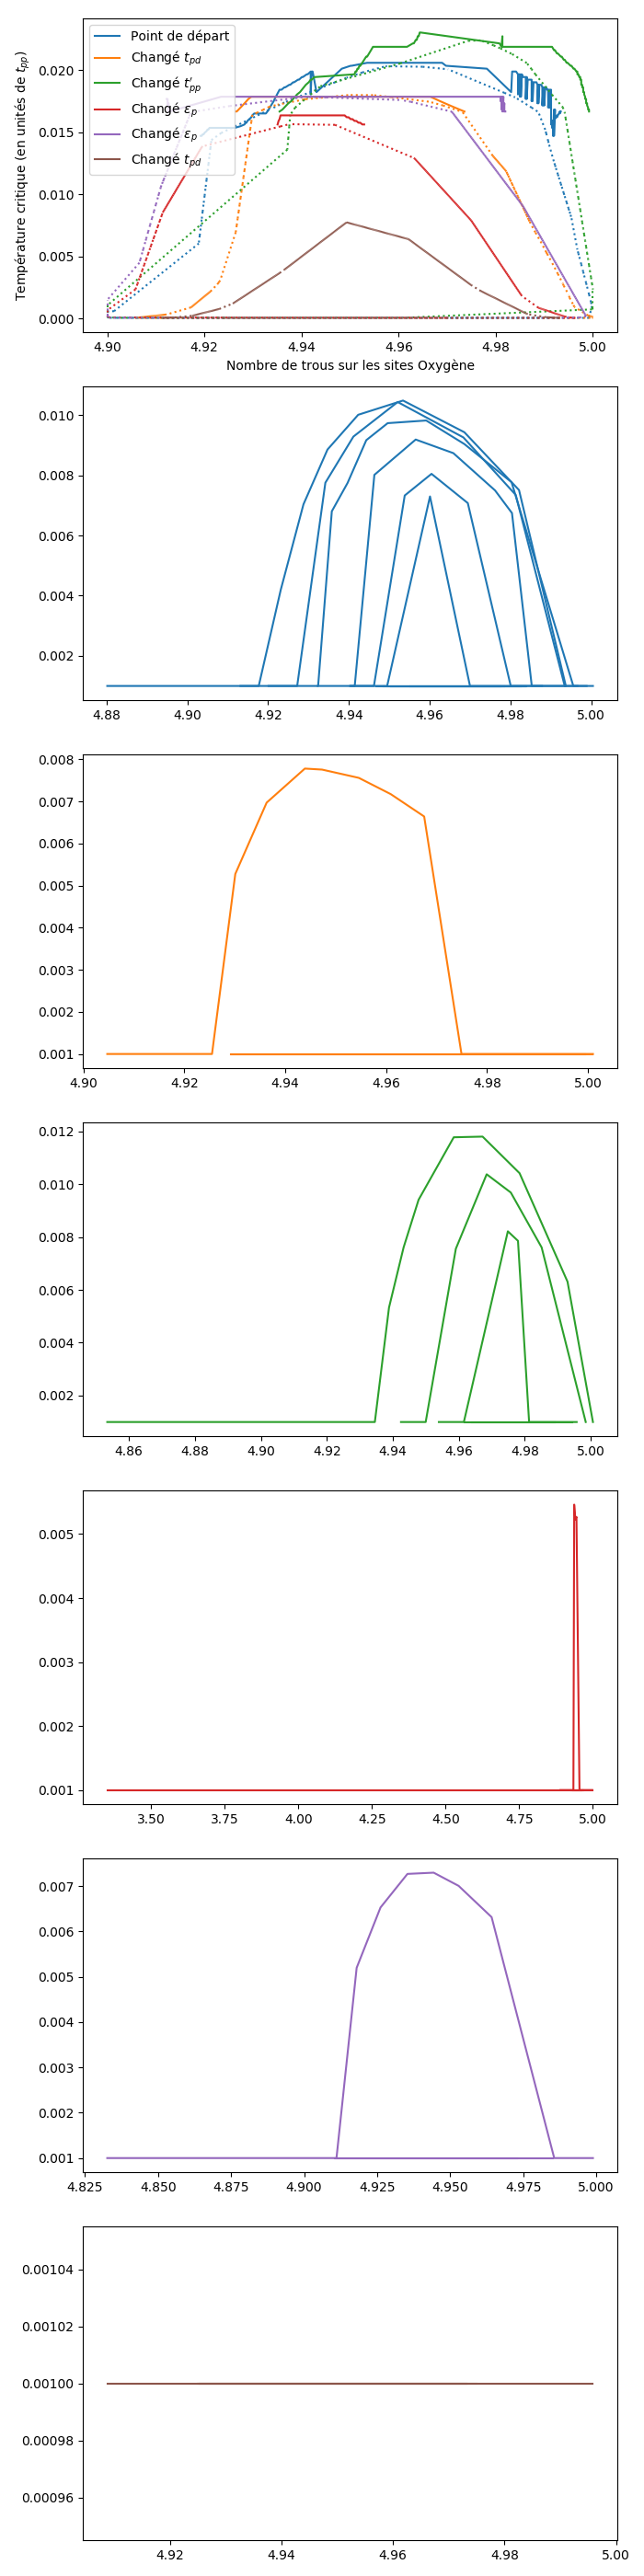

In [62]:
import copy
%matplotlib notebook
from scipy import interpolate
from scripts import utils
from scipy.spatial import ConvexHull, convex_hull_plot_2d


n_points = 500
x_axis = "occupation" 
grids = {"occupation":np.linspace(4.90,5,n_points),
         "pn" : np.linspace(0.9,0.95,n_points),
         "N" : np.linspace(0.62,0.68,n_points),
         "mu" : np.linspace(10,12,n_points),
         "Chi0" : np.linspace(1,3,n_points)}

grid = grids[x_axis]
beta_grid = np.linspace(40,68,50)
to_plot = [x_axis,"order"]
seuil_tc = 0.002
stiffness_seuil = 0.001
var_tc = 0.0001
min_temp = 1/68
lim_occ = 5.001


def plot_Tc(conds_i,ax):
    beta,x_axis_data,order,stiffness,occ = dico.plot_dico(["beta",x_axis,"order","stiffness","occupation"],conds = conds[conds_i])
    order = order[:,0][occ[:,0] < lim_occ]
    x_axis_data = x_axis_data[:,0][occ[:,0] < lim_occ]
    beta = beta[:,0][occ[:,0] < lim_occ]
    stiffness = stiffness[:,0][occ[:,0] < lim_occ]

    #We need to correct according to the stiffness (we put the wrong points at stiffness_seuil)
    order[stiffness<=1/np.pi] = stiffness_seuil
    
    #Now we need to add data, this is only possible for the points that we just removed.
    #For all those points, we need to create another point at coordinates : 
    #Beta : beta/(stiffness*np.pi/2)
    #Order : 0.002, to be included in the border
    #x_axis : same 
   
 
    xx, yy = np.meshgrid(grid,beta_grid)
    interpolated = interpolate.griddata((x_axis_data,beta), order, (xx.ravel(), yy.ravel()),method="linear")
    all_tc_points = np.argwhere(np.logical_and(interpolated > seuil_tc - var_tc,interpolated < seuil_tc + var_tc))[:,0]
    all_tc_points = all_tc_points
    x_tc_points = xx.ravel()[all_tc_points]
    y_tc_points = yy.ravel()[all_tc_points]
    if len(x_tc_points) and len(y_tc_points):  
        x_tc_points,y_tc_points = utils.sort_points(x_tc_points,y_tc_points)
    color = ax[0].plot(np.array(x_tc_points),1/np.array(y_tc_points),label=labels[conds_i])[0].get_color()
    #Now we need to add the points due to the stiffness minimum criteria
    #First we interpolate the stiffness on the same points
    interpolated_stiffness = interpolate.griddata((x_axis_data,beta), stiffness, (xx.ravel(), yy.ravel()),method="linear")
    stiffness_points = np.argwhere(np.logical_and(interpolated_stiffness<=1/np.pi,interpolated_stiffness >= stiffness_seuil))[:,0]

    minimal_criteria_beta = yy.ravel()[stiffness_points]/(interpolated_stiffness[stiffness_points]*np.pi/1)
    minimal_criteria_x_axis = xx.ravel()[stiffness_points]
    minimal_criteria_x_axis,minimal_criteria_beta = utils.sort_points(minimal_criteria_x_axis,minimal_criteria_beta )
    minimal_criteria_x_axis = np.array(minimal_criteria_x_axis)
    minimal_criteria_beta = np.array(minimal_criteria_beta)
    #ax[0].plot(4 - 4*minimal_criteria_x_axis,1/minimal_criteria_beta,"o",color=color)

    all_stiffness_points = np.zeros((minimal_criteria_beta.shape[0],2))
    all_stiffness_points[:,0] = minimal_criteria_x_axis
    all_stiffness_points[:,1] = minimal_criteria_beta
    hull = ConvexHull(all_stiffness_points)
    
    for simplex in hull.simplices:
        ax[0].plot(all_stiffness_points[simplex, 0], 1/all_stiffness_points[simplex, 1], ':',color=color)

    temperatures = np.unique(beta,return_index=True)[1]
    
    X_plot = np.split(x_axis_data,temperatures)[1:]
    Y_plot = np.split(beta,temperatures)[1:]
    order_plot = np.split(order,temperatures)[1:]
    for i in range(len(Y_plot)):
        ax[conds_i+1].plot(X_plot[i],order_plot[i],color=color)
    
def plot_normal(conds,ax):
    X,f = dico.plot_dico(to_plot,conds = conds)
    ax.set_ylabel("Cuivre")
    ax.set_xlabel("Oxygen")
    ploted = ax.errorbar(X[:,0],f[:,0],xerr=8*X[:,1],yerr=8*f[:,1], fmt='--o') 
    plt.tight_layout()
    return ploted[0].get_color()

#plt.savefig("Comparaison-best",bbox_inches="tight",pad_inches=0.5, dpi=150)
conds = [ {"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":0},
         {"ep":9,"U":12,"tpd":1.4,"tppp":1,"zero_order":0},
         {"ep":9,"U":12,"tpd":1.5,"tppp":0.7,"zero_order":0},
         {"ep":8,"U":12,"tpd":1.5,"tppp":1,"zero_order":0},
         {"ep":8.5,"U":12,"tpd":1.5,"tppp":1,"zero_order":0},
         {"ep":9,"U":12,"tpd":1.3,"tppp":1,"zero_order":0}]
labels = ["Point de départ",
         "Changé $t_{pd}$",
         "Changé $t_{pp}'$",
         "Changé $\epsilon_p$",
         "Changé $\epsilon_p$",
         "Changé $t_{pd}$"]
fig,ax = plt.subplots(len(conds)+1,figsize=(7,4.5*len(conds)+1))
for i,cond in enumerate(conds):
    plot_Tc(i,ax)

ax[0].set_xlabel("Nombre de trous sur les sites Oxygène")
ax[0].set_ylabel("Température critique (en unités de $t_{pp}$)")
ax[0].legend()
plt.tight_layout()
# Save just the portion _inside_ the second axis's boundaries
extent = ax[0].get_window_extent().transformed(fig.dpi_scale_trans.inverted())

# Pad the saved area by 10% in the x-direction and 20% in the y-direction
fig.savefig('Graphs/results/KT-TC-O-doping.png', bbox_inches=extent.expanded(1.5, 1.3),dpi=300)
plt.show()

<IPython.core.display.Javascript object>


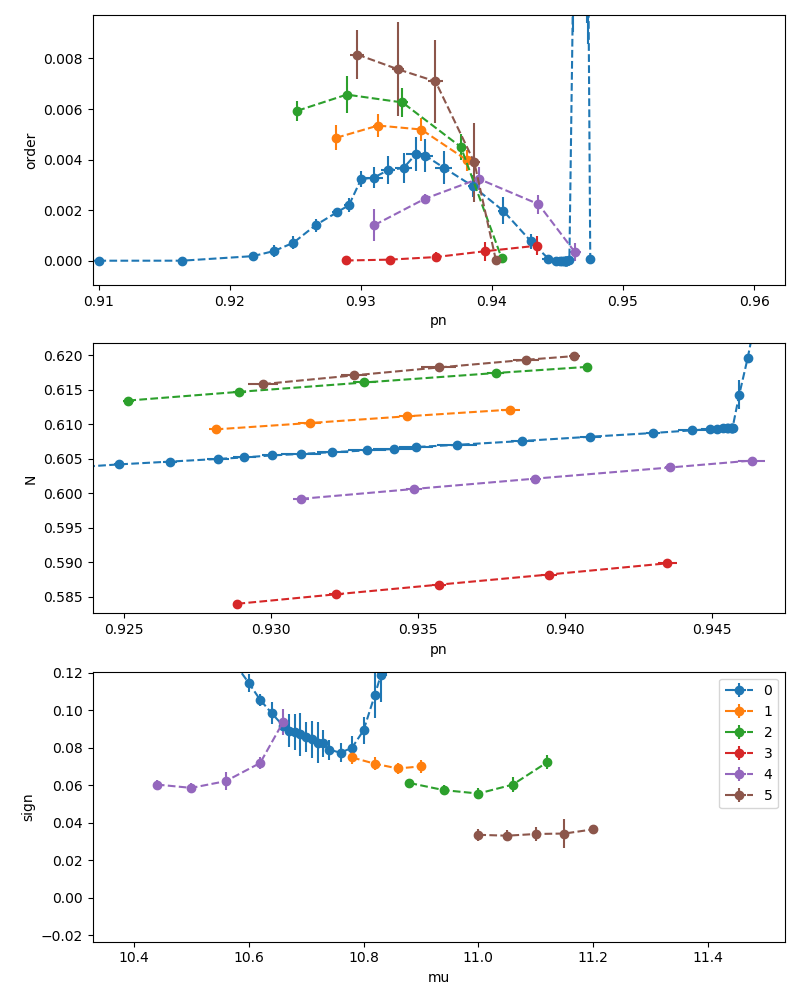

In [64]:
%matplotlib notebook
def aff(X,f,ax,label="",xlabel="",ylabel=""):
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.errorbar(X[:,0],f[:,0],xerr=8*X[:,1],yerr=8*f[:,1], fmt='--o',label=label)  
    plt.tight_layout()
fig,ax = plt.subplots(3,figsize=(8,10))

plots = [["pn","order"],["pn","N"],["mu","sign"]]

params = [{"beta":60,"ep":8,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}, #0
         {"beta":60,"ep":8,"U":12,"tpd":1.5,"tppp":0.8,"zero_order":0}, #1
        {"beta":60,"ep":8,"U":12,"tpd":1.5,"tppp":0.6,"zero_order":0},#2
        {"beta":60,"ep":7,"U":12,"tpd":1.5,"tppp":0.6,"zero_order":0},#3
        {"beta":60,"ep":7.5,"U":12,"tpd":1.5,"tppp":0.6,"zero_order":0},#4
        {"beta":60,"ep":7.5,"U":12,"tpd":1.7,"tppp":0.6,"zero_order":0}]#5
        #{"beta":60,"ep":7,"U":12,"tpd":1.7,"tppp":0.6,"zero_order":0}]#6
          
Goal = [{"beta":60,"ep":4.5,"U":12,"tpd":2.1,"tppp":0.2,"zero_order":0},]



for i,param in enumerate(params):
    for j,plot in enumerate(plots):
        g,f = dico.plot_dico(plot,conds = param)
        aff(g,f,ax[j],label=i,xlabel=plot[0],ylabel = plot[1])
    
plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


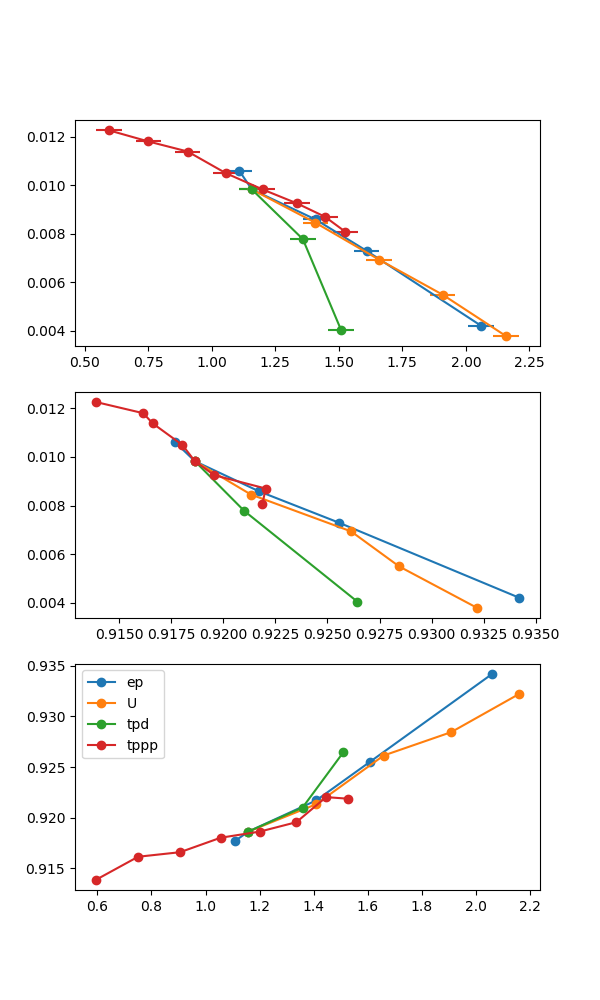

0.9870129870129872
0.9611852968282709
-0.9573384554116484
-0.9662337662337661
SpearmanrResult(correlation=-0.9712418300653595, pvalue=2.6702387794195264e-13)


In [65]:
from scipy import stats
eps = np.array([8,8.5,8.75,9,9.1])
tpds = np.array([1.3,1.4,1.5])
tppps = [0.6,0.7,0.8,0.9,1,1.1,1.2,1.3]
Us = [12,12.25,12.5,12.75,13]

gap_values = {
    "ep": [9.939879759519037, 10.390781563126254, 10.591182364729459, 10.841683366733466, 10.891783567134269],
    "U" : 10.841683366733466 - np.array([0,0.25,0.5,0.75,1]),
    "tpd":[10.490981963927858, 10.641282565130261, 10.841683366733466],
    "tppp":[11.404280856171237, 11.249249849969996, 11.094218843768754, 10.944188837767555, 10.799159831966396, 10.664132826565314, 10.554110822164432, 10.474094818963795]
}
%matplotlib notebook
plot_dico = {}
def add_aff_max(X,Y,f,ax,label="",factor=0):
    f[:,0][Y[:,0]>5] = 0 #Make sure we plot only hole doped states
    if label not in plot_dico:
        plot_dico[label] = {}
        plot_dico[label]["X"] = []
        plot_dico[label]["f"] = []
    factor = factors[label][factor]
    plot_dico[label]["X"].append(get_max_X(X,f,factor))
    plot_dico[label]["f"].append(get_max_f(X,f,factor))

def get_max_X(X,f,factor):
    y,x = utils.sort_points(f[:,0],X[:,0])
    if factor == 1:
        return x[-1]
    elif factor == 2:
        return (x[-1] + x[-2])/2
    
def get_max_f(X,f,factor):
    return np.max(f[:,0])
params_start = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1}
to_plot = ["pn","occupation","order"]
betas = [64,60,55,50,47,45]
factors = {"ep" : [1,1,2,2,2],
            "U" : [2,1,1,1,1] ,
          "tpd" : [1,2,2,1],
          "tppp" : [1,2,1,1,2,2,2,2]}
    
beta = 60
for i,ep in enumerate(eps):
    params = params_start.copy()
    params["ep"] = ep
    X,Y,f = dico.plot_dico(to_plot,conds = params)
    color = add_aff_max(X,Y,f,ax,label="ep",factor=i) 
    
    
beta = 60
for i,U in enumerate(Us):
    params = params_start.copy()
    params["U"] = U
    X,Y,f = dico.plot_dico(to_plot,conds = params)
    color = add_aff_max(X,Y,f,ax,label="U",factor=i) 
     
beta = 60
for i,tpd in enumerate(tpds):
    params = params_start.copy()
    params["tpd"] = tpd
    X,Y,f = dico.plot_dico(to_plot,conds = params)
    color = add_aff_max(X,Y,f,ax,label="tpd",factor=i) 
       
beta = 60
for i,tppp in enumerate(tppps):
    params = params_start.copy()
    params["tppp"] = tppp
    X,Y,f = dico.plot_dico(to_plot,conds = params)
    color = add_aff_max(X,Y,f,ax,label="tppp",factor=i) 

def compute_corr(gap,dens):
    return (np.mean(gap*dens) - np.mean(gap)*np.mean(dens))/(np.std(gap)*np.std(dens))

def compute_spearson(gap,dens):
    gap_s =  np.argsort(np.argsort(gap))
    dens_s = np.argsort(np.argsort(dens))
    return compute_corr(gap_s,dens_s)


fig,ax = plt.subplots(3,figsize=(6,10))


all_order = []
all_gaps = []
all_dens = []
for key, value in plot_dico.items():
    ax[0].errorbar(12-np.array(gap_values[key]),value["f"],fmt="-o",xerr=[0.05]*len(value["X"]),label=key)
    ax[1].errorbar(value["X"],value["f"],fmt="-o",label=key)
    ax[2].errorbar(12-np.array(gap_values[key]),value["X"],fmt="-o",label=key)
    #print(compute_corr(12-np.array(gap_values[key]),value["X"]))
    #print(compute_spearson(12-np.array(gap_values[key]),value["X"]))
    all_gaps.extend(12-np.array(gap_values[key]))
    all_dens.extend(value["X"])
    all_order.extend(value["f"])
print(compute_spearson(all_gaps,all_dens))
print(compute_corr(np.array(all_gaps),np.array(all_dens)))
print(compute_corr(np.array(all_order),np.array(all_dens)))
print(compute_spearson(np.array(all_order),np.array(all_dens)))
print(stats.spearmanr(np.array(all_order),np.array(all_dens)))
    
    
plt.legend()
#plt.savefig("Comparaison-best",bbox_inches="tight",pad_inches=0.5, dpi=150)
plt.show()


<IPython.core.display.Javascript object>


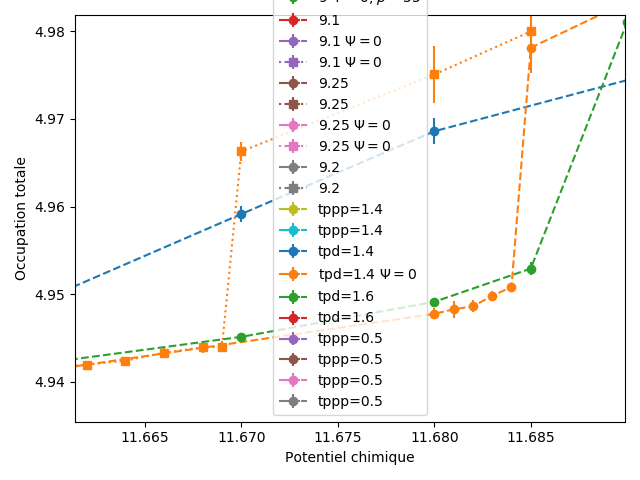

In [3]:
import json

%matplotlib notebook
def aff(X,f,ax,label="",fmt=None,color=None):
    #X[:,1] = 0
    #f[:,1] = 0
    ax.set_ylabel("Occupation totale")
    ax.set_xlabel("Potentiel chimique")
    if fmt==None:
        fmt="--o"
    ploted = ax.errorbar(X[:,0],f[:,0],xerr=8*X[:,1],yerr=8*f[:,1], fmt=fmt,label=label,color=color) 
    plt.tight_layout()
    return ploted[0].get_color()
fig,ax = plt.subplots()


to_plot = ["mu","occupation"]
orderBy = "mu"

array_of_everything = []

#Starting-POINT
params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="9")
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_right"]) 

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
X,f = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="9",fmt=":s",color = color)
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_left"])

"""No order parameter"""
params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="9 $\Psi=0$")
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_right"]) 

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
X,f = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="9 $\Psi=0$",fmt=":s",color = color)
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_left"])

"""beta = 55 for ep=9"""


params = {"beta":55,"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label=r"9 $\Psi=0$, $\beta=55$")
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_right"]) 

"""9.1"""
params = {"beta":60,"ep":9.1,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
#X = X[:12]
#f = f[:12]
color = aff(X,f,ax,label="9.1")
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_right"])

"""No order parameter"""
params = {"beta":60,"ep":9.1,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="9.1 $\Psi = 0$")
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_right"])

params = {"beta":60,"ep":9.1,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
X,f = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="9.1 $\Psi = 0$",fmt=":s",color = color)
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_left"])

"""9.25"""
params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
#X = X[:12]
#f = f[:12]
color = aff(X,f,ax,label="9.25")
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_right"])

params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
X,f = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
#X = X[4:]
#f = f[4:]
color = aff(X,f,ax,label="9.25",fmt=":s",color = color)
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_left"])

"""No order parameter"""
params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="9.25 $\Psi = 0$")
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_right"])

params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
X,f = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="9.25 $\Psi = 0$",fmt=":s",color = color)
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_left"])

#9.2
params = {"beta":60,"ep":9.2,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
#X = X[:8]
#f = f[:8]
color = aff(X,f,ax,label="9.2")
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_right"])

params = {"beta":60,"ep":9.2,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
X,f = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
#X = X[4:]
#f = f[4:]
color = aff(X,f,ax,label="9.2",fmt=":s",color = color)
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_left"])

params = {"beta":60,"ep":9.5,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
#color = aff(X,f,ax,label="9.5") 
array_of_everything.append([params,list(X[:,0]),list(f[:,0]),"to_right"])

"""tppp 1.4, hysteresis"""
params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.4,"zero_order":0}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="tppp=1.4") 

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.4,"zero_order":0}
X,f = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="tppp=1.4") 


"""tpd 1.4, normal"""
params = {"beta":60,"ep":9,"U":12,"tpd":1.4,"tppp":1,"zero_order":0}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="tpd=1.4") 

params = {"beta":60,"ep":9,"U":12,"tpd":1.4,"tppp":1,"zero_order":1}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="tpd=1.4 $\Psi=0$") 


"""tpd 1.6, supra"""
params = {"beta":60,"ep":9,"U":12,"tpd":1.6,"tppp":1,"zero_order":0}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="tpd=1.6") 

params = {"beta":60,"ep":9,"U":12,"tpd":1.6,"tppp":1,"zero_order":0}
X,f = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="tpd=1.6") 



"""tppp 0.5, supra"""
params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":0.5,"zero_order":0}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="tppp=0.5") 

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":0.5,"zero_order":0}
X,f = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="tppp=0.5") 




"""tppp 1.3, supra"""
params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.3,"zero_order":0}
X,f = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="tppp=0.5") 

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.3,"zero_order":0}
X,f = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(X,f,ax,label="tppp=0.5") 

  
f = open("hyst_data.json","w")
json.dump(array_of_everything,f)
f.close()

#ax.set_aspect("equal")
plt.legend()
#ax.set_xlim(4.87,5.005)
#ax.set_ylim(-0.001,0.0125)
#plt.savefig("Comparaison-best",bbox_inches="tight",pad_inches=0.5, dpi=300)
plt.show()

<IPython.core.display.Javascript object>


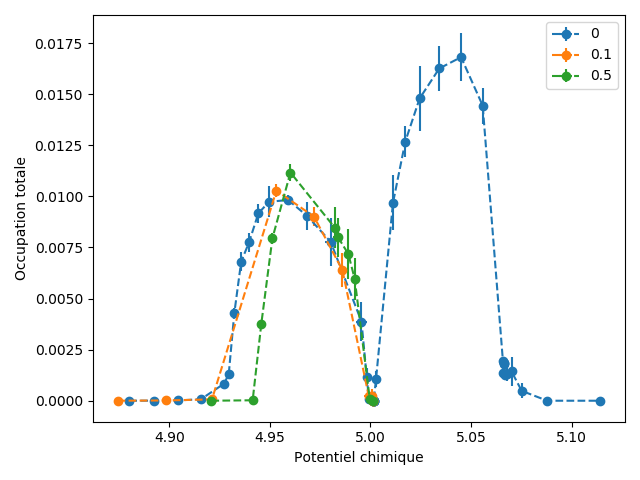

In [67]:
#On va dans la direction du gradient
%matplotlib notebook

def aff(X,f,ax,label=""):
    ax.set_ylabel("Occupation totale")
    ax.set_xlabel("Potentiel chimique")
    ax.errorbar(X[:,0],f[:,0],xerr=8*X[:,1],yerr=8*f[:,1],fmt='--o',label=label)  
    plt.tight_layout()
fig,ax = plt.subplots()

to_plot = ["occupation","order"]
orderBy = "mu"

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
g,f = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff(g,f,ax,label="0")

params = {"beta":60,"ep":9.00226422,"U":11.9975951,"tpd":1.51156013,"tppp":0.99728485,"zero_order":0}
g,f = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff(g,f,ax,label="0.1")


params = {"beta":60,"ep":9.01132111,"U":11.98797552,"tpd":1.55780067,"tppp":0.98642424,"zero_order":0}
g,f = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff(g,f,ax,label="0.5")

plt.legend()


<IPython.core.display.Javascript object>


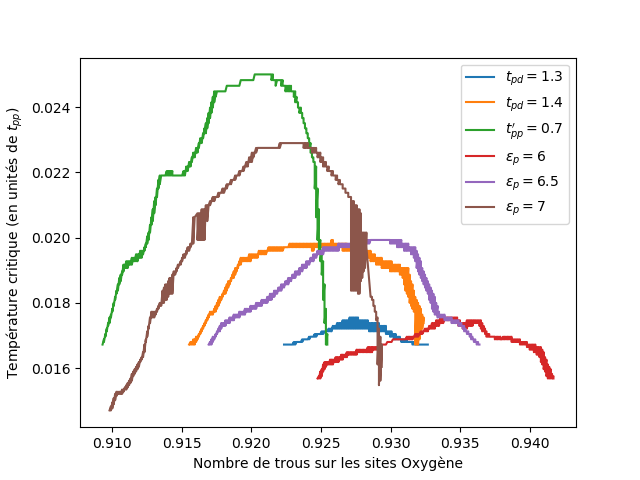

<IPython.core.display.Javascript object>


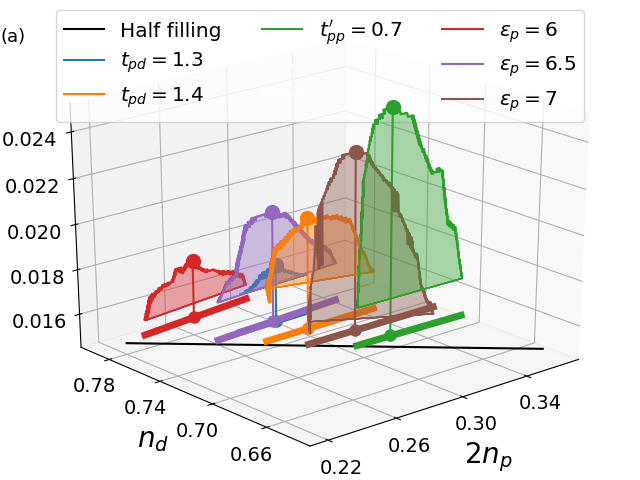

In [13]:
import copy
%matplotlib notebook
from scipy import interpolate
from scripts import utils
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib
n_points = 500
x_axis = "pn" 
y_axis = "N"
grids = {"occupation":np.linspace(4.90,5,n_points),
         "pn" : np.linspace(0.9,0.95,n_points),
         "N" : np.linspace(0.62,0.68,n_points),
         "mu" : np.linspace(10,12,n_points),
         "Chi0" : np.linspace(1,3,n_points)}

grid = grids[x_axis]
beta_grid = np.linspace(40,68,100)
to_plot = [x_axis,"order"]
seuil_tc = 0.002
var_tc = 0.0005
min_temp = 1/68
lim_occ = 5.001


def plot_Tc(conds_i,ax,ax_3d):
    beta,X1,Y1,order,occ = dico.plot_dico(["beta",x_axis,y_axis,"order","occupation"],conds = conds[conds_i])
    order = order[:,0][occ[:,0] < lim_occ]
    X1 = X1[:,0][occ[:,0] < lim_occ]
    beta = beta[:,0][occ[:,0] < lim_occ]
    Y1 = Y1[:,0][occ[:,0] < lim_occ]
    #order[order < 0.002] = 0

    xx, zz = np.meshgrid(grid,beta_grid)
    interpolated = interpolate.griddata((X1,beta), order, (xx.ravel(), zz.ravel()),method="linear")
    all_tc_points = np.argwhere(np.logical_and(interpolated > seuil_tc,interpolated < seuil_tc + var_tc))
    all_tc_points = all_tc_points[:,0]
    
    #Now we need y as a function of x to get a 3d plot
    xx1,yy1 = np.meshgrid(grid,grids[y_axis])
    interpolated_y = interpolate.griddata(X1,Y1,xx1.ravel())
    x_tc_points = xx.ravel()[all_tc_points]
    z_tc_points = zz.ravel()[all_tc_points]
    y_tc_points = interpolated_y[all_tc_points]
    x_tc_points,y_tc_points,z_tc_points = utils.sort_all(None,x_tc_points,y_tc_points,z_tc_points)
    color = ax.plot(np.array(x_tc_points),1/np.array(z_tc_points),label=labels[conds_i])[0].get_color()
    xs = 4 - 4*np.array(x_tc_points)
    ys = 2 - 2*np.array(y_tc_points)
    zs = 1/np.array(z_tc_points)
    
    
    color = ax_3d.plot(xs,ys,zs,label=labels[conds_i])[0].get_color()
    ax_3d.plot([xs[0],xs[-1]],[ys[0],ys[-1]],2*[0.015],color=color,linewidth=5)
    #ax.add_collection3d(plt.fill_between(x,y,-0.1, color='orange', alpha=0.3,label="filled plot"),1, zdir='y')
    verts = [(xs[i],ys[i],zs[i]) for i in range(len(xs))] + [(xs[0],ys[0],zs[0]),(xs[-1],ys[-1],zs[-1])]
    ax_3d.add_collection3d(Poly3DCollection([verts],color=color,alpha=.4)) # Add a polygon instead of fill_between
    
    argmax = np.argmax(zs)
    ax_3d.plot(2*[xs[argmax]],2*[ys[argmax]],[0.015,zs[argmax]],color=color)
    ax_3d.plot([xs[argmax]],[ys[argmax]],[zs[argmax]],"o",color=color,markersize=10)
    ax_3d.plot([xs[argmax]],[ys[argmax]],[0.015],"o",color=color,markersize=8)
    
    
    
    
def plot_normal(conds,ax):
    X,f = dico.plot_dico(to_plot,conds = conds)
    ax.set_ylabel("Cuivre")
    ax.set_xlabel("Oxygen")
    ploted = ax.errorbar(X[:,0],f[:,0],xerr=8*X[:,1],yerr=8*f[:,1], fmt='--o') 
    plt.tight_layout()
    return ploted[0].get_color()

#plt.savefig("Comparaison-best",bbox_inches="tight",pad_inches=0.5, dpi=150)
conds = [ {"ep":9,"U":12,"tpd":1.3,"tppp":1,"zero_order":0},
         {"ep":9,"U":12,"tpd":1.4,"tppp":1,"zero_order":0},
         {"ep":9,"U":12,"tpd":1.5,"tppp":0.7,"zero_order":0},
         {},
         {},
         {"ep":8,"U":12,"tpd":1.5,"tppp":1,"zero_order":0},
         {"ep":8.5,"U":12,"tpd":1.5,"tppp":1,"zero_order":0},
         {"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}]

labels = ["$t_{pd} = 1.3$",
         "$t_{pd} = 1.4$",
         "$t_{pp}' = 0.7$",
          "",
          "",
         "$\epsilon_p = 6$",
         "$\epsilon_p = 6.5$",
         "$\epsilon_p = 7$"]
fig,ax = plt.subplots(1)
fig = plt.figure()

ax_3d = fig.gca(projection='3d')



#Half_filling
x = np.linspace(0.22,0.36,5)
y = 1 - x
ax_3d.plot(x,y,len(x)*[0.015],color="black",label="Half filling")
#ax_3d.plot([0.26],[0.68],[0.016],color="white",label=" ")

#fig,ax = plt.subplots(len(conds)+1,figsize=(7,4))
for i,cond in enumerate(conds):
    if cond:
        plot_Tc(i,ax,ax_3d)
    else:
        ax_3d.plot([0.26],[0.68],[0.016],color="white",label=" ")
        
    
    
ax_3d.view_init(25,-131)
ax_3d.xaxis.set_rotate_label(False) 
ax_3d.set_xlabel("$2n_p$", fontsize=20, rotation = 0,labelpad=13)
ax_3d.yaxis.set_rotate_label(False) 
ax_3d.set_ylabel("$n_d$", fontsize=20, rotation = 0,labelpad=8)
ax_3d.zaxis.set_rotate_label(False) 
ax_3d.set_zlabel("$T_C$", fontsize=20, rotation = 0,labelpad=20)

ax_3d.set_xticks([0.22,0.26,0.30,0.34])
ax_3d.set_yticks([0.78,.74,.70,0.66])
ax_3d.set_title("(a)",pad=-30,loc="left",fontsize=13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

for t in ax_3d.zaxis.get_major_ticks(): 
    t.label.set_fontsize(14)
    t.set_pad(9.)

    
plt.legend(loc=9,ncol=3,fontsize=14.5).set_zorder(0)


ax.set_xlabel("Nombre de trous sur les sites Oxygène")
ax.set_ylabel("Température critique (en unités de $t_{pp}$)")
ax.legend()
plt.tight_layout()
fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
# Save just the portion _inside_ the second axis's boundaries
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

# Pad the saved area by 10% in the x-direction and 20% in the y-direction
fig.savefig('Graphs/3d_Tc_plot.png', bbox_inches=extent.expanded(1.5, 1.3),dpi=300)
plt.show()

<IPython.core.display.Javascript object>


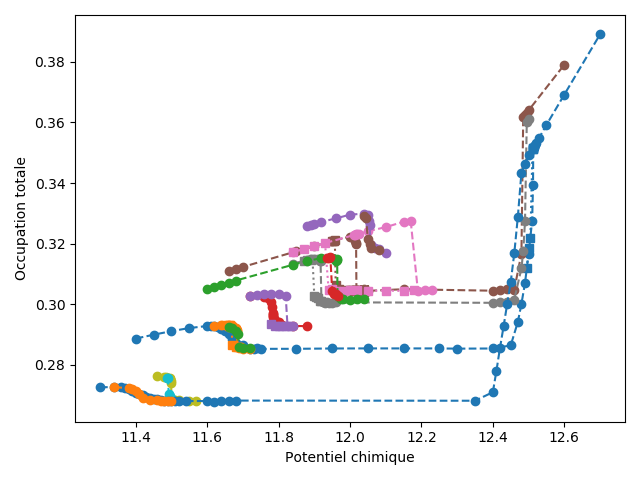

In [5]:
import json

%matplotlib notebook
def aff(data,ax,label="",fmt=None,color=None):
    X = data[0]
    f = data[1]
    #X[:,1] = 0
    #f[:,1] = 0
    ax.set_ylabel("Occupation totale")
    ax.set_xlabel("Potentiel chimique")
    if fmt==None:
        fmt="--o"
    ploted = ax.errorbar(X[:,0],f[:,0],xerr=8*X[:,1],yerr=8*f[:,1], fmt=fmt,label=label,color=color) 
    plt.tight_layout()
    return ploted[0].get_color()
fig,ax = plt.subplots()


to_plot = ["mu","D","D","mu","occupation"]
orderBy = "mu"

array_of_everything = []

#Starting-POINT
params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="9")

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
to_plot_data = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="9",fmt=":s",color = color)

"""No order parameter"""
params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="9 $\Psi=0$") 

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
to_plot_data = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="9 $\Psi=0$",fmt=":s",color = color)

"""beta = 55 for ep=9"""


params = {"beta":55,"ep":9,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label=r"9 $\Psi=0$, $\beta=55$")

"""9.1"""
params = {"beta":60,"ep":9.1,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
#X = X[:12]
#f = f[:12]
color = aff(to_plot_data,ax,label="9.1")

"""No order parameter"""
params = {"beta":60,"ep":9.1,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="9.1 $\Psi = 0$")

params = {"beta":60,"ep":9.1,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
to_plot_data = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="9.1 $\Psi = 0$",fmt=":s",color = color)

"""9.25"""
params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
#X = X[:12]
#f = f[:12]
color = aff(to_plot_data,ax,label="9.25")

params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
to_plot_data = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
#X = X[4:]
#f = f[4:]
color = aff(to_plot_data,ax,label="9.25",fmt=":s",color = color)

"""No order parameter"""
params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="9.25 $\Psi = 0$")

params = {"beta":60,"ep":9.25,"U":12,"tpd":1.5,"tppp":1,"zero_order":1}
to_plot_data = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="9.25 $\Psi = 0$",fmt=":s",color = color)

#9.2
params = {"beta":60,"ep":9.2,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
#X = X[:8]
#f = f[:8]
color = aff(to_plot_data,ax,label="9.2")

params = {"beta":60,"ep":9.2,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
to_plot_data = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
#X = X[4:]
#f = f[4:]
color = aff(to_plot_data,ax,label="9.2",fmt=":s",color = color)

params = {"beta":60,"ep":9.5,"U":12,"tpd":1.5,"tppp":1,"zero_order":0}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
#color = aff(to_plot_data,ax,label="9.5") 

"""tppp 1.4, hysteresis"""
params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.4,"zero_order":0}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="tppp=1.4") 

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.4,"zero_order":0}
to_plot_data = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="tppp=1.4") 


"""tpd 1.4, normal"""
params = {"beta":60,"ep":9,"U":12,"tpd":1.4,"tppp":1,"zero_order":0}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="tpd=1.4") 

params = {"beta":60,"ep":9,"U":12,"tpd":1.4,"tppp":1,"zero_order":1}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="tpd=1.4 $\Psi=0$") 


"""tpd 1.6, supra"""
params = {"beta":60,"ep":9,"U":12,"tpd":1.6,"tppp":1,"zero_order":0}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="tpd=1.6") 

params = {"beta":60,"ep":9,"U":12,"tpd":1.6,"tppp":1,"zero_order":0}
to_plot_data = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="tpd=1.6") 



"""tppp 0.5, supra"""
params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":0.5,"zero_order":0}
to_plot_data = dico_supra.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="tppp=0.5") 

params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":0.5,"zero_order":0}
to_plot_data = dico_hyst.plot_dico(to_plot,orderBy = orderBy,conds = params)
color = aff(to_plot_data,ax,label="tppp=0.5") 


#ax.set_aspect("equal")
#plt.legend()
#ax.set_xlim(4.87,5.005)
#ax.set_ylim(-0.001,0.0125)
#plt.savefig("Comparaison-best",bbox_inches="tight",pad_inches=0.5, dpi=300)
plt.show()

<IPython.core.display.Javascript object>


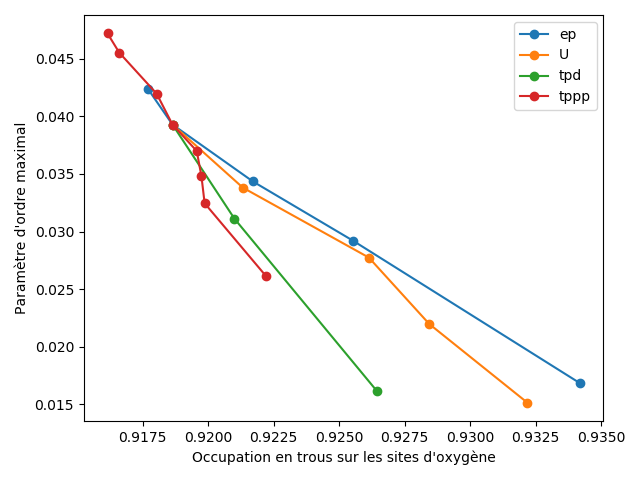

ep : 8
0.6063996
ep : 8.5
0.6211034000000001
ep : 8.75
0.6298640333333334
ep : 9
0.6399191
ep : 9.1
0.6444622333333333
U : 12
0.6399191
U : 12.25
0.6296886666666666
U : 12.5
0.6211605333333333
U : 12.75
0.6132067333333333
U : 13
0.6061421333333334
tpd : 1.3
0.6217571333333333
tpd : 1.4
0.6307863333333333
tpd : 1.5
0.6399191
tppp : 0.7
0.6491213333333332
tppp : 0.8
0.6457744666666666
tppp : 0.9
0.6424808000000001
tppp : 1
0.6399191
tppp : 1.1
0.6374052666666667
tppp : 1.2
0.6352912666666667
0.633407
0.6316031
SpearmanrResult(correlation=-0.977777777777778, pvalue=2.3650075622277484e-14)
(-0.9330195533886687, 7.074292629809292e-10)


In [34]:
from scipy import stats
%matplotlib notebook
plot_dico = {}
def add_aff_max(data,ax,param_value,label="",factor=0):
    X = data[0]
    Y = data[1]
    mu = data[2]
    occ = data[3]
    f = data[4]
    f[:,0][occ[:,0]>5] = 0 #Make sure we plot only hole doped states
    ax.set_ylabel("Paramètre d'ordre maximal")
    ax.set_xlabel("Occupation en trous sur les sites d'oxygène")
    if label not in plot_dico:
        plot_dico[label] = {}
        plot_dico[label]["X"] = []
        plot_dico[label]["f"] = []
        plot_dico[label]["param"] = []
    factor = factors[label][factor]
    print(get_max_X(Y,f,factor))
    plot_dico[label]["X"].append(get_max_X(X,f,factor))
    plot_dico[label]["f"].append(4*get_max_f(X,f,factor))
    plot_dico[label]["param"].append(param_value)
    plt.tight_layout()

def get_max_X(X,f,factor):
    y,x = utils.sort_points(f[:,0],X[:,0])
    if factor == 1:
        return x[-1]
    elif factor == 2:
        return (x[-1] + x[-2])/2
   
    
def get_max_f(X,f,factor):
    return np.max(f[:,0])
fig,ax = plt.subplots()
params_start = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1}
to_plot = ["pn","N","mu","occupation","order"]
betas = [64,60,55,50,47,45]
eps = [8,8.5,8.75,9,9.1]
Us = [12,12.25,12.5,12.75,13]
tpds = [1.3,1.4,1.5]
tppps = [0.7,0.8,0.9,1,1.1,1.2]
factors = {"ep" : [1,1,2,2,2,1],
            "U" : [2,1,1,1,1] ,
          "tpd" : [1,2,2,1],
          "tppp" : [2,1,1,2,2,1,2,2]}
    
beta = 60
for i,ep in enumerate(eps):
    params = params_start.copy()
    params["ep"] = ep
    to_plot_data = dico.plot_dico(to_plot,conds = params)
    print("ep : " + str(ep))
    color = add_aff_max(to_plot_data,ax,ep,label="ep",factor=i) 
    
    
beta = 60
for i,U in enumerate(Us):
    params = params_start.copy()
    params["U"] = U
    to_plot_data = dico.plot_dico(to_plot,conds = params)
    print("U : " + str(U))
    color = add_aff_max(to_plot_data,ax,U,label="U",factor=i) 
     
beta = 60
for i,tpd in enumerate(tpds):
    params = params_start.copy()
    params["tpd"] = tpd
    to_plot_data = dico.plot_dico(to_plot,conds = params)
    print("tpd : " + str(tpd))
    color = add_aff_max(to_plot_data,ax,tpd,label="tpd",factor=i) 
       
beta = 60
for i,tppp in enumerate(tppps):
    params = params_start.copy()
    params["tppp"] = tppp
    to_plot_data = dico.plot_dico(to_plot,conds = params)
    print("tppp : " + str(tppp))
    color = add_aff_max(to_plot_data,ax,tppp,label="tppp",factor=i) 
 




params = params_start.copy()
params["tppp"] = 1.3
X1,Y1,f1,g1,d1 = dico.plot_dico(to_plot,conds = params)
X2,Y2,f2,g2,d2 = dico_hyst.plot_dico(to_plot,conds = params)
X = np.concatenate((X1,X2),axis=0)
Y = np.concatenate((Y1,Y2),axis=0)
f = np.concatenate((f1,f2),axis=0)
g = np.concatenate((g1,g2),axis=0)
d = np.concatenate((d1,d2),axis=0)
color = add_aff_max([X,Y,f,g,d],ax,params["tppp"],label="tppp",factor=i+1) 


params = params_start.copy()
params["tppp"] = 1.4
X1,Y1,f1,g1,d1 = dico.plot_dico(to_plot,conds = params)
X2,Y2,f2,g2,d2 = dico_hyst.plot_dico(to_plot,conds = params)
X = np.concatenate((X1,X2),axis=0)
Y = np.concatenate((Y1,Y2),axis=0)
f =np.concatenate((f1,f2),axis=0)
g =np.concatenate((g1,g2),axis=0)
d =np.concatenate((d1,d2),axis=0)
color = add_aff_max([X,Y,f,g,d],ax,params["tppp"],label="tppp",factor=i+2) 


all_X = []
all_F = []
for key, value in plot_dico.items():
    all_X.extend(value["X"])
    all_F.extend(value["f"])
    ax.plot(value["X"],value["f"],"-o",label=key)
    
print(stats.spearmanr(all_X,all_F))
print(stats.pearsonr(all_X,all_F))

plt.legend()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


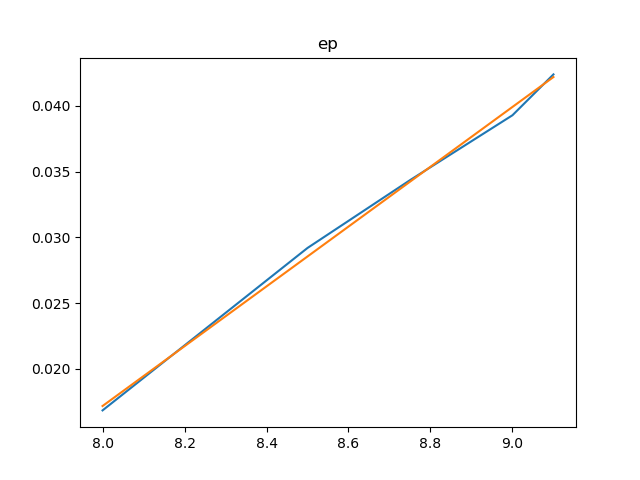

Gradient : 0.03514422507678302


<IPython.core.display.Javascript object>


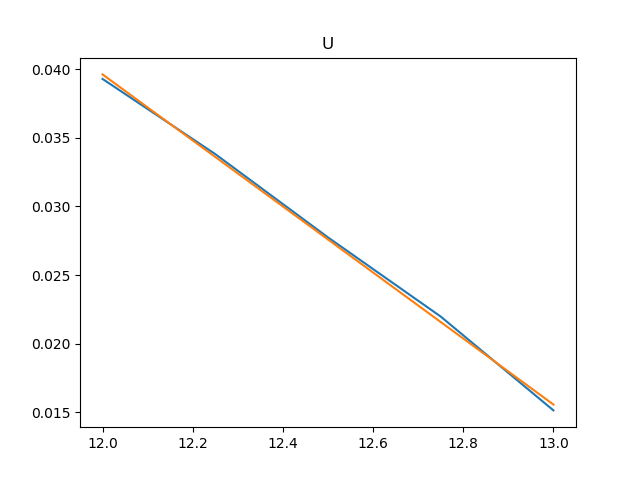

Gradient : -0.03716995363214837


<IPython.core.display.Javascript object>


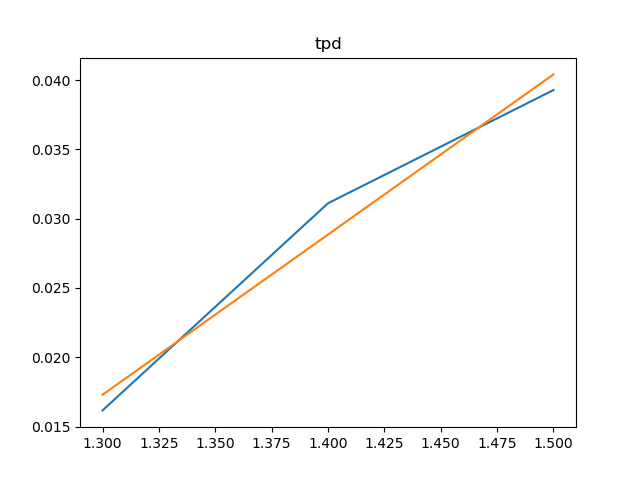

Gradient : 0.17867284904688255


<IPython.core.display.Javascript object>


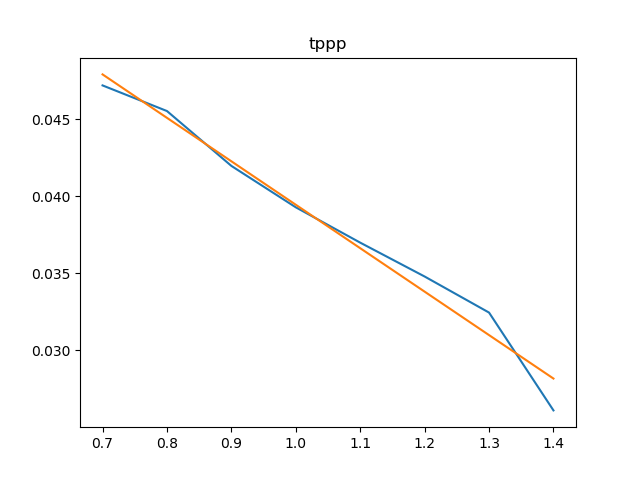

Gradient : -0.04356674271975663


In [35]:
for i in plot_dico:
    fig,ax = plt.subplots()
    plot_dico[i]["param"] = np.array(plot_dico[i]["param"])
    plot_dico[i]["f"] = np.array(plot_dico[i]["f"])
    ax.plot(plot_dico[i]["param"],plot_dico[i]["f"])
    ax.set_title(i)
    fit = np.polyfit(plot_dico[i]["param"],plot_dico[i]["f"],1)
    ax.plot(plot_dico[i]["param"],plot_dico[i]["param"]*fit[0] + fit[1])
    print("Gradient : " + str(fit[0]/0.647))

<IPython.core.display.Javascript object>


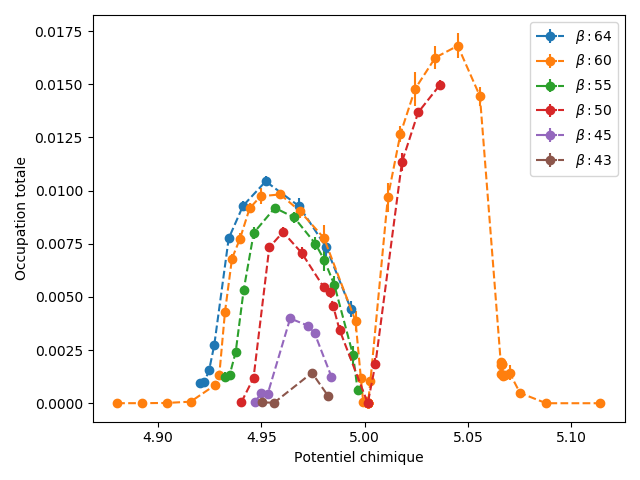

In [5]:
%matplotlib notebook



def aff(data,ax,label=""):
    ax.set_ylabel("Occupation totale")
    ax.set_xlabel("Potentiel chimique")
    occupation = data[-1]
    for i in range(len(data)):
        #data[i] = data[i][occupation[:,0]<5.001]
        pass
    X = data[0]
    f = data[1]
    f_err = f[:,1]*4
    x_err = X[:,1]*4
    f = f[:,0]#[X[:,0]<5.001]
    X = X[:,0]#[X[:,0]<5.001]
    
    
    ax.errorbar(X,f,xerr=x_err,yerr=f_err,fmt='--o',label=label)  
    plt.tight_layout()
    
fig,ax = plt.subplots()

to_plot = ["occupation", "order","occupation"]
orderBy = "mu"

betas = [64,60,55,50,45,43]
for beta in betas:
    params = {"beta":beta,"ep":9,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
    data = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
    aff(data,ax,label=r"$\beta : " + str(beta) + "$")
    
        
#Ns = np.array([0.5,0.74])
#plt.plot(Ns,2*Ns-1,"-")
    
plt.legend()
#plot_half(ax)
#ax.set_aspect('equal')
#ax.set_ylim(top=0.012)
#ax.set_xlim(4.895,5.005)
#plt.tight_layout()

#fig.savefig('Graphs/results/mu-occ-ep',dpi=300)
plt.show()

<IPython.core.display.Javascript object>


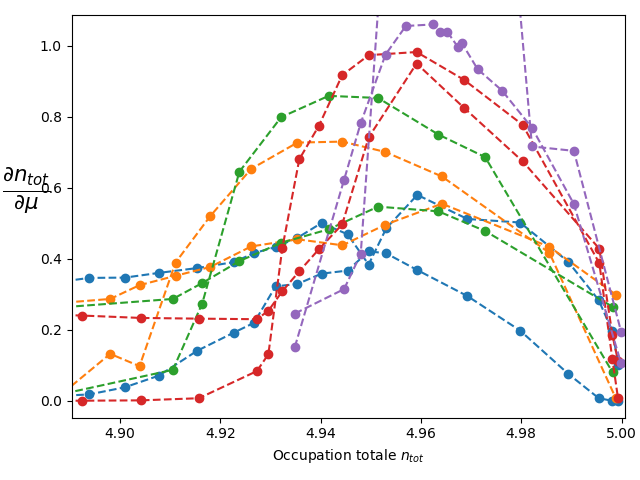

In [27]:
%matplotlib notebook
def aff(data,ax,label=""):
    X = data[0]
    f = data[1]
    occ = data[2]
    ax.set_ylabel(r"$\frac{\partial n_{tot}}{\partial \mu}$",rotation=0,size=22,labelpad=10)
    ax.set_xlabel("Occupation totale $n_{tot}$")

    X = np.gradient(f[:,0],X[:,0])
    
    occ_lim = 5.000
    occ_low_lim= 4.85
    X = X[occ[:,0]<occ_lim]
    f = f[occ[:,0]<occ_lim]
    occ = occ[occ[:,0]<occ_lim]
    X = X[occ[:,0]>occ_low_lim]
    f = f[occ[:,0]>occ_low_lim]
    ploted = ax.errorbar(f[:,0],X,xerr=0,yerr=0, fmt='--o',label=label)  
    plt.tight_layout()
    return ploted[0].get_color()

def aff_normal(data,ax,color=None):
    X = data[0]
    f = data[1]
    occ = data[2]
    ax.set_ylabel(r"$\frac{\partial n_{tot}}{\partial \mu}$",rotation=0,size=22,labelpad=10)
    ax.set_xlabel("Occupation totale $n_{tot}$")

    occ_lim = 5.000
    occ_low_lim= 4.85
    X = X[occ[:,0]<occ_lim]
    f = f[occ[:,0]<occ_lim]
    occ = occ[occ[:,0]<occ_lim]
    X = X[occ[:,0]>occ_low_lim]
    f = f[occ[:,0]>occ_low_lim]
    ax.errorbar(X[:,0],100*f[:,0],xerr=0,yerr=0, fmt='--o',color=color)  
    plt.tight_layout()
    
fig,ax = plt.subplots()

to_plot = ["mu","occupation","occupation"]
to_plot_order = ["occupation","order","occupation"]
eps = [8,8.5,8.75,9,9.1]
#eps = [8,8.5,8.75,9,9.1,9.2,9.5]

for ep in eps:
    params = {"beta":60,"ep":ep,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
    data = dico.plot_dico(to_plot,conds = params)
    color = aff(data,ax,label="$\epsilon_p : " + str(ep) + "$")
    
    data = dico.plot_dico(to_plot_order,conds = params)
    aff_normal(data,ax,color=color)
    
for U in Us:
    params = {"beta":60,"ep":9.0,"U":U,"tpd":1.5,"tppp":1.,"zero_order":0}
    data = dico.plot_dico(to_plot,conds = params)
    #aff(g,f,ax,label="U : " +str(U))
    
for tpd in tpds:
    params = {"beta":60,"ep":9,"U":12,"tpd":tpd,"tppp":1.,"zero_order":0}
    data = dico.plot_dico(to_plot,conds = params)
    #aff(g,f,ax,label="$t_{pd} : " + str(tpd) + "$")
    
tppps_loc = [0.5,0.6,0.7,0.8,0.9,1,1.2,1.3,1.4]
tppps_loc.reverse()
for tppp in tppps_loc:
    params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":tppp,"zero_order":0}
    data = dico.plot_dico(to_plot,conds = params)
    #aff(g,f,ax,label="$t_{pp}' : " + str(tppp) + "$")

#plt.legend(loc="upper left").set_zorder(0)
#ax.set_yscale("log")
#plot_half(ax)
#ax.set_aspect('equal')
#ax.set_ylim(top=50)
#ax.set_xlim(4.895,5.005)
plt.tight_layout()
plt.savefig("Graphs/results/docc-dmu-tppp.pdf")
plt.show()

<IPython.core.display.Javascript object>


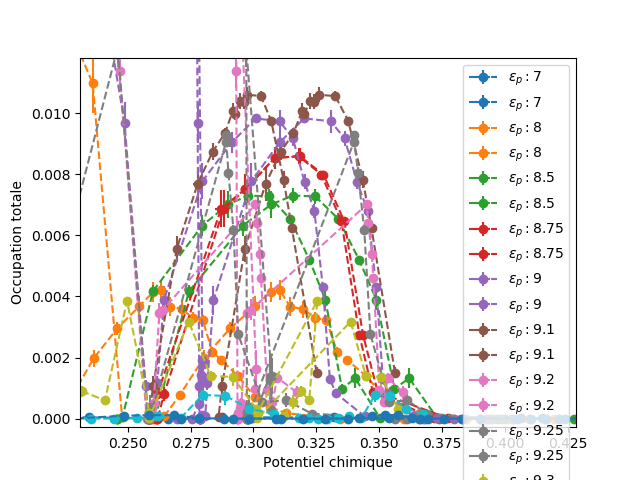

In [14]:
%matplotlib notebook



def aff(data,ax,label="",color=None):
    ax.set_ylabel("Occupation totale")
    ax.set_xlabel("Potentiel chimique")
    occupation = data[-1]
    for i in range(len(data)):
        #data[i] = data[i][occupation[:,0]<5.001]
        pass
    X = data[0]
    f = data[1]
    f_err = f[:,1]*4
    x_err = X[:,1]*4
    f = f[:,0]#[X[:,0]<5.001]
    X = X[:,0]#[X[:,0]<5.001]
    occupation = occupation[:,0]
    
    #f = np.gradient(f,X)
    return ax.errorbar(X,f,xerr=x_err,yerr=f_err,fmt='--o',label=label,color=color)[0].get_color()
    
fig,ax = plt.subplots()

orderBy = "mu"


for ep in eps:
    to_plot = ["occupation","order","occupation"]
    params = {"beta":60,"ep":ep,"U":12,"tpd":1.5,"tppp":1.,"zero_order":0}
    data = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
    data[0][:,0] = 5 - data[0][:,0] + 0.26
    color = aff(data,ax,label="$\epsilon_p : " + str(ep) + "$")
    
    to_plot = ["pn","order","occupation"]
    data = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
    data[0][:,0] = 4 - 4*data[0][:,0]
    aff(data,ax,label="$\epsilon_p : " + str(ep) + "$",color=color)
    
   
        
#Ns = np.array([0.5,0.74])
#plt.plot(Ns,2*Ns-1,"-")
    
plt.legend()
#plot_half(ax)
#ax.set_aspect('equal')
#ax.set_ylim(top=0.012)
#ax.set_xlim(4.895,5.005)
#plt.tight_layout()

#fig.savefig('Graphs/results/mu-occ-ep',dpi=300)
plt.show()

'#ff7f0e'

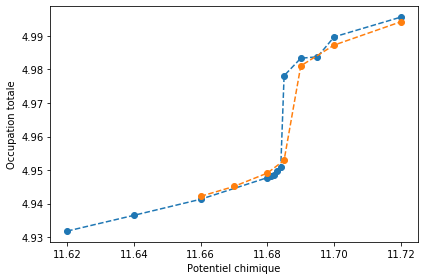

In [14]:
fig,ax = plt.subplots()
def aff(data,ax,label="",color=None):
    ax.set_ylabel("Occupation totale")
    ax.set_xlabel("Potentiel chimique")
    X,f = data
    f = f[:,0]#[X[:,0]<5.001]
    X = X[:,0]#[X[:,0]<5.001]
    
    func = lambda x,f : (2 - 2*x,2-2*f)
    
    #f = np.gradient(f,X)
    #X,f = func(X,f)
    
    color = ax.errorbar(X,f,fmt='--o',label=label,color=color)[0].get_color() 
    plt.tight_layout()
    return color



to_plot = ["mu","occupation"]
orderBy = "mu"
params = {"beta":60,"ep":9,"U":12,"tpd":1.5,"tppp":1.,"zero_order":1}
data = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff(data,ax)
params = {"beta":55,"ep":9,"U":12,"tpd":1.5,"tppp":1.,"zero_order":1}
data = dico.plot_dico(to_plot,orderBy = orderBy,conds = params)
aff(data,ax)

In [41]:
import json
import sys
import numpy as np
from scripts import utils
from scripts import measurements_dico as md
import matplotlib.pyplot as plt
from importlib import reload  
reload(md)
%matplotlib notebook

#plt.style.use('seaborn-dark')
measurements = {"Normal" : ["N","pn","occupation","sign","stiffness","D","SzSites","k","ekin","Chi0","order"],
                   "Matsubara": {}
               }

eps = [7,8,8.5,8.75,9,9.1,9.2,9.25,9.3,9.35,9.5]
Us = [11.75,12,12.25,12.5,12.75,13]
tpds = [1.3,1.4,1.5,1.6,1.7]
tppps = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.6,1.8]
print("Loading AntiFerro Hysteresis")
dico_hyst_antiferro = md.get_measurements_along(measurements,"AllData/Anti_ferro/Hysteresis/",15,errors=True)

print("Loading Ferro")
dico_ferro = md.get_measurements_along(measurements,"AllData/Ferro/",15,errors=True)


Loading AntiFerro Hysteresis
No stiffness yet for AllData/Anti_ferro/Hysteresis//9/ep9_beta60_mu11.45_U12_tpd1.5_tppp1/DATA/../DATA/
Total number of measurement folders : 26
Loading Ferro
Total number of measurement folders : 2


<IPython.core.display.Javascript object>


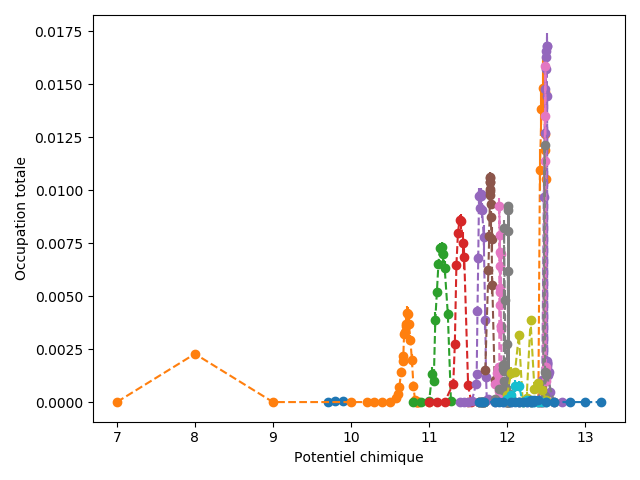

In [34]:
import glob
import os
import re
single_occupation_files = ["ekin.dat","pn.dat"]
single_filenames = ["Chi0.dat","Chi0Sites.dat","D.dat","DSites.dat","ekin.dat","k.dat","kSites.dat","N.dat","NSites.dat","pn.dat","sign.dat","Sz.dat","SzSites.dat"]
multiple_dat_filenames = ["ChiFull","ChiFullSites","dgreen","hyb","pK","pxgreen","pxygreen","pygreen"]
multiple_json_filenames = ["green","self"]


def find_last_results(files_dir):
    results_list = []
    for f in glob.glob(os.path.join(files_dir,"OUT/params*.meas.json")):
        results_list.append(int(re.search(r"params([0-9]+)\.meas\.json",f).group(1)))
    try:
        return(max(results_list))
    except:
        print("There is no output to delete, take a look")
        exit()
     
def delete_safely(file):
    try:
        os.remove(file)
    except Exception as e:
        print("Erreur au fichier " + file)
        
def delete_last(files_dir):
    iteration = find_last_results(files_dir)
    data_dir = os.path.join(files_dir,"DATA/")
    input_dir = os.path.join(files_dir,"IN/")
    output_dir = os.path.join(files_dir,"OUT/")
    for file in single_filenames:
        try:
            data = np.loadtxt(os.path.join(data_dir,file))
            if int(data[-1,0]) == int(iteration):
                try:
                    np.savetxt(os.path.join(data_dir,file),data[:-1,:],fmt="%i %f")
                except:
                        np.savetxt(os.path.join(data_dir,file),data[:-1,:],fmt="%i %f %f %f %f")
            else:
                print("Erreur au fichier " + file + " " + str(int(data[-1,0])) + " :  " + str(int(iteration)))
        except Exception as e:
            print("Erreur au fichier " + file)
            print(str(e))
    for file in multiple_dat_filenames:
        delete_safely(os.path.join(data_dir,file + str(iteration) + ".dat"))
    for file in multiple_json_filenames:
        delete_safely(os.path.join(data_dir,file + str(iteration) + ".json"))
    delete_safely(os.path.join(input_dir,"Hyb" + str(int(iteration)+1) + ".json"))  
    delete_safely(os.path.join(input_dir,"params" + str(int(iteration)+1) + ".json"))       
    delete_safely(os.path.join(output_dir,"params" + str(iteration) + ".meas.json"))    
    return 0
#END
delete_last("AllData/Anti_ferro/Hysteresis//9/ep9_beta60_mu11.45_U12_tpd1.5_tppp1/DATA/..")

0

<IPython.core.display.Javascript object>


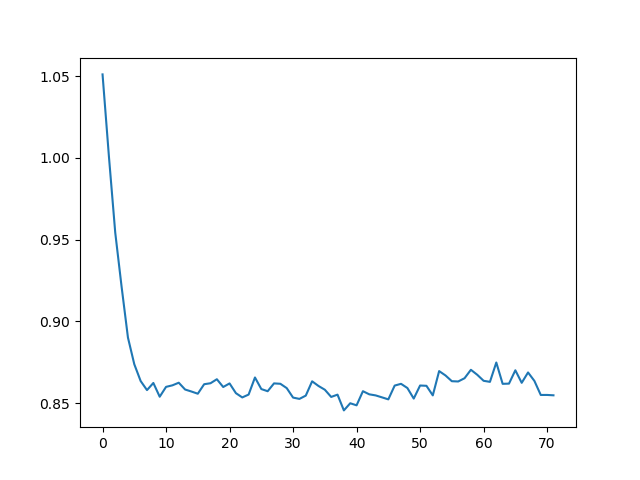